# FINAL CAPSTONE

Dataset:[15 Americans publications](https://www.kaggle.com/snapcrack/all-the-news#articles3.csv)


# Introduction 

The following is a dataset from articles from 15 American publications. It has 3 sets of data with articles that was scraped on the internet. But we only use one that contains 50,000 news articles. 


* The articles1 dataset  contains:     
    * id    
    * title                 
    * publication               
    * author        
    * date        
    * year         
    * month                 
    * url                                                             
    * content (full articles)   
    
        
 
The original source can be found [here](https://www.kaggle.com/snapcrack/all-the-news#articles1.csv)


For this research we only looked at the aricles __titles__ and __contents__  


# Research Interest   

__Goal:__ To build a model that can help us put together articles with the same __Topics__ together. The articles __Titles__ are used to figure out the different articles topics.      
Then use our model to be able to predict what topic a new article would fall under based on its content.    


The project has been divided into:

1. Loading libraries

2. Importing Data

3. Resampling Data

4. Cleaning Data

5. Creating Training and Test Sets

6. Create Features Using tf-idf

7. Clustering of Titles of articles in the Dataset using LSA.
      * LSA using 10 Topics 	
      * LSA using 3 Topis
   
8. Modeling With Random Forest Classifier
      * Random Forest Classifier with 10 articles 	
      * Random Forest Classifier with 3 articles 	
      
9. Modeling with Stochastic Gradient Descent
      * Stochastic Gradient Descent with 10 articles    	
      * Stochastic Gradient Descent with 3 articsles
      
10. Modeling With Keras 
      * Keras with 10 articles  	
      * Keras with 3 articles 
    
11. Future Work 



In [375]:
import tensorflow as tf
import os
import keras
import gc

import time

import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

from IPython.display import Image
from IPython.display import display


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

#import plotly.plotly as py
#import plotly.tools as tls

In [376]:
# Import the dataset
import pandas as pd
import numpy as np

# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop



from keras.layers import Convolution1D, MaxPooling1D, Flatten


# Import the backend
from keras import backend as K

## Import Data

In [377]:
df  = pd.read_csv('articles1.csv')
print('The shape of the data in articles 1 is:', df.shape)

The shape of the data in articles 1 is: (50000, 10)


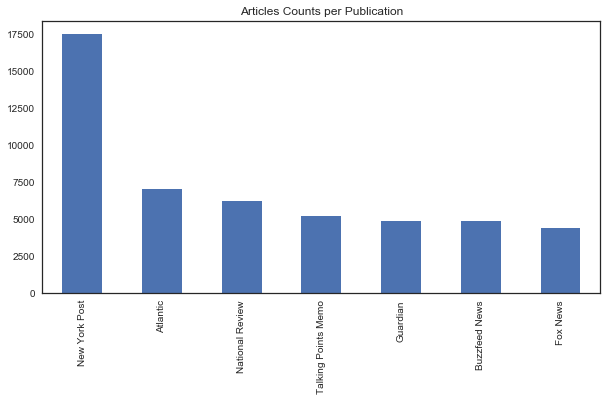

In [378]:
df0 = pd.read_csv('articles2.csv')
plt.figure(figsize=(10, 5))
df0.publication.value_counts().plot(kind='bar')
plt.title('Articles Counts per Publication')
plt.show()

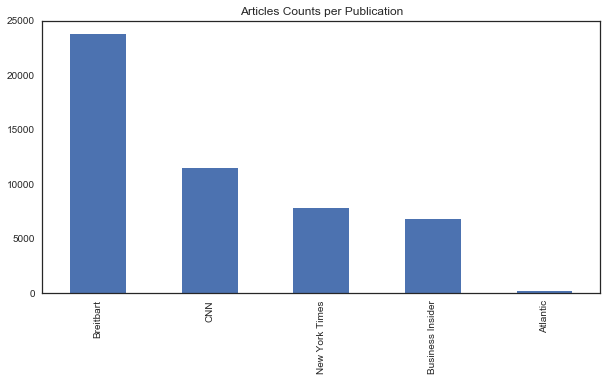

In [379]:
plt.figure(figsize=(10, 5))
df.publication.value_counts().plot(kind='bar')
plt.title('Articles Counts per Publication')
plt.show()

In [380]:
df['publication'].value_counts()

Breitbart           23781
CNN                 11488
New York Times       7803
Business Insider     6757
Atlantic              171
Name: publication, dtype: int64

## Resampling the Data Frame

In [381]:
#Remove article to use for prediction
df_new = df.sample(n=1, replace=False, axis = 0, random_state=20)
rem = df_new.index
X_new = df['content'][rem[0]]

In [382]:
X_new = pd.Series(X_new, index=rem)

In [383]:
display(X_new)

18991    BERLIN (Reuters)  —   Tens of thousands of peo...
dtype: object

In [384]:
df.drop(rem, axis=0, inplace = True)
df1 = df.sample(frac=0.2, replace=False, axis = 0, random_state=20)

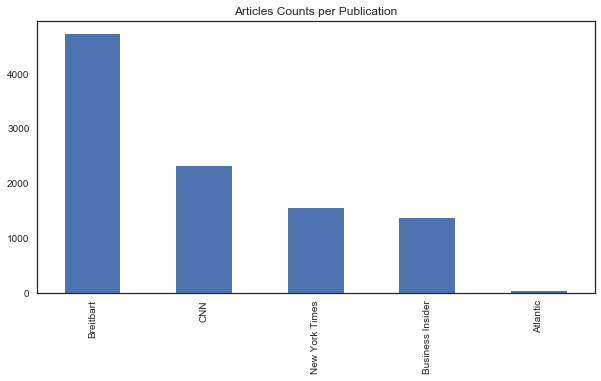

In [385]:
plt.figure(figsize=(10, 5))
df1.publication.value_counts().plot(kind='bar')
plt.title('Articles Counts per Publication')
plt.show()

In [386]:
df1['publication'].value_counts()

Breitbart           4727
CNN                 2310
New York Times      1556
Business Insider    1370
Atlantic              37
Name: publication, dtype: int64

In [387]:
#delete df to clear up space in the memory

del df

In [388]:
rem[0]  in df1.index

False

In [389]:
X_new

18991    BERLIN (Reuters)  —   Tens of thousands of peo...
dtype: object

In [390]:
gc.collect()

16147

In [391]:
print('The shape of the data in articles 1 is:', df1.shape)
display(df1.head())

The shape of the data in articles 1 is: (10000, 10)


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
10140,10140,28876,"’The View’ Co-Hosts Ask If Palin, Nugent, Kid ...",Breitbart,Pam Key,2017-04-21,2017.0,4.0,NaN,"Friday on ABC’s “The View,” the panel discusse..."
31612,31624,50390,Istanbul attack: ISIS claims nightclub shootin...,CNN,Euan McKirdy,2017-01-02,2017.0,1.0,NaN,Istanbul (CNN) ISIS claimed responsibility for...
7077,7077,25574,Trump’s Breezy Calls to World Leaders Leave Di...,New York Times,Mark Landler,2017-04-14,2017.0,4.0,NaN,WASHINGTON — Donald J. Trump inherited a ...
35657,36455,55281,Trump campaign: We’re facing an emergency goal...,CNN,Eugene Scott,2016-06-18,2016.0,6.0,NaN,Washington (CNN) The Donald Trump campaign on ...
8449,8449,27185,Scientists Turn Spinach Leaf into Beating Huma...,Breitbart,Jack Hadfield,2017-03-30,2017.0,3.0,NaN,Researchers at Worcester Polytechnic Institute...


## Clean Data

In [392]:
df1.columns

Index(['Unnamed: 0', 'id', 'title', 'publication', 'author', 'date', 'year',
       'month', 'url', 'content'],
      dtype='object')

In [393]:
# Count nulls 
null_count = df1.isnull().sum()
null_count[null_count>0]

author     1260
url       10000
dtype: int64

### Clean the Article Content

In [394]:
df1['content'].head(1)

10140    Friday on ABC’s “The View,” the panel discusse...
Name: content, dtype: object

In [395]:
#Here we clean the content by removing all the  punctuation, 
#removing all that is unnecessary.

df1['content'] = df1['content'].str.replace(r'[^a-zA-Z0-9 ]', "",).fillna('')
df1['content'] = df1['content'].str.lower()

In [396]:
df1['content'].head(1)

10140    friday on abcs the view the panel discussed th...
Name: content, dtype: object

### Clean the Article Title 

In [397]:
# List of Publications to remove in titles
df1['publication'].value_counts()

Breitbart           4727
CNN                 2310
New York Times      1556
Business Insider    1370
Atlantic              37
Name: publication, dtype: int64

In [398]:
df1['title'].head(1)

10140    ’The View’ Co-Hosts Ask If Palin, Nugent, Kid ...
Name: title, dtype: object

In [399]:
df1['title'] = df1['title'].str.replace(r'Breitbart|CNN|The New York Times|Business Insider|Atlantic', "")

In [400]:
#Here we clean the Title by removing all the  punctuation, 
#removing all that is unnecessary.

df1['title'] = df1['title'].str.replace(r'[^a-zA-Z0-9 ]', "",).fillna('')
df1['title'] = df1['title'].str.lower()

In [401]:
df1['title'].head(1)

10140    the view cohosts ask if palin nugent kid rock ...
Name: title, dtype: object

In [402]:
df = df1[['title', 'publication', 'author', 'date', 'year','month', 'content']]

In [403]:
#delete df1 to clear up space in the memory

del df1

In [404]:
print('The shape of the data in articles 1 is:', df.shape)
display(df.head())

The shape of the data in articles 1 is: (10000, 7)


,title,publication,author,date,year,month,content
10140,the view cohosts ask if palin nugent kid rock ...,Breitbart,Pam Key,2017-04-21,2017.0,4.0,friday on abcs the view the panel discussed th...
31612,istanbul attack isis claims nightclub shooting...,CNN,Euan McKirdy,2017-01-02,2017.0,1.0,istanbul cnn isis claimed responsibility for t...
7077,trumps breezy calls to world leaders leave dip...,New York Times,Mark Landler,2017-04-14,2017.0,4.0,washington donald j trump inherited a co...
35657,trump campaign were facing an emergency goal o...,CNN,Eugene Scott,2016-06-18,2016.0,6.0,washington cnn the donald trump campaign on sa...
8449,scientists turn spinach leaf into beating huma...,Breitbart,Jack Hadfield,2017-03-30,2017.0,3.0,researchers at worcester polytechnic institute...


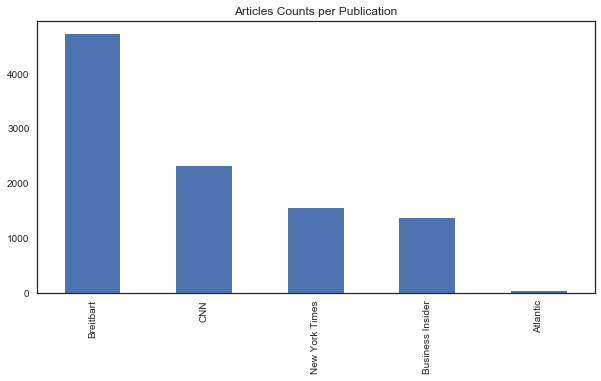

In [405]:
plt.figure(figsize=(10, 5))
df.publication.value_counts().plot(kind='bar')
plt.title('Articles Counts per Publication')
plt.show()

Here we can note that most of the articles in the data set are articles that are published by Breitbart.

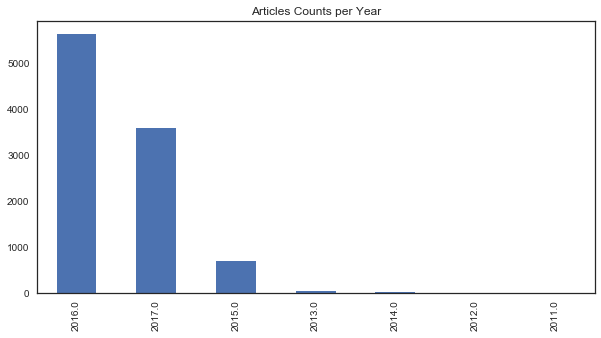

In [406]:
plt.figure(figsize=(10, 5))
df.year.value_counts().plot(kind='bar')
plt.title('Articles Counts per Year')
plt.show()

Here we can note that most of the articles in the data set were articles that are were written in 2016 and 2017. With least than 1000 of them written in 2015, 2013 and 2014.  

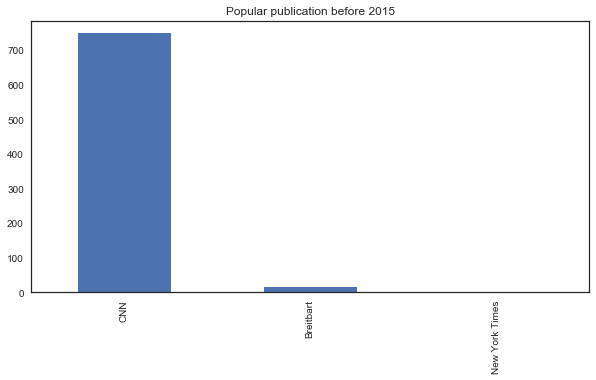

In [407]:
plt.figure(figsize=(10, 5))
df.loc[lambda df: df['year'] <= 2015, :].publication.value_counts().plot(kind='bar')
plt.title('Popular publication before 2015')
plt.show()

It looks like CNN has all articles before 2015 and that around the elections, Breibart has 16 only. 

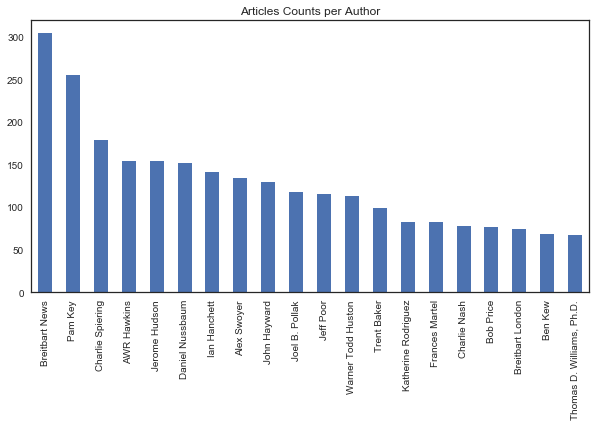

In [408]:
plt.figure(figsize=(10, 5))
df.author.value_counts().head(20).plot(kind='bar')
plt.title('Articles Counts per Author')
plt.show()

Once again it seems as if an author from Breitbart has the most articles under his name.   

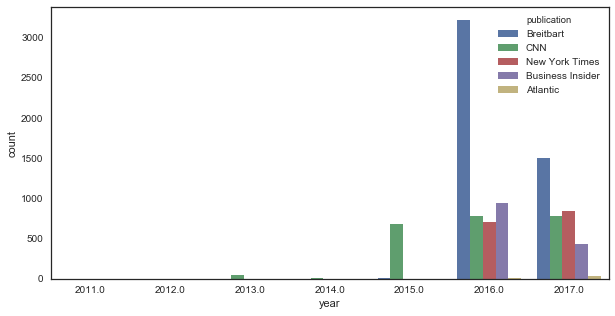

In [409]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="year", hue="publication", data=df)
plt.show()

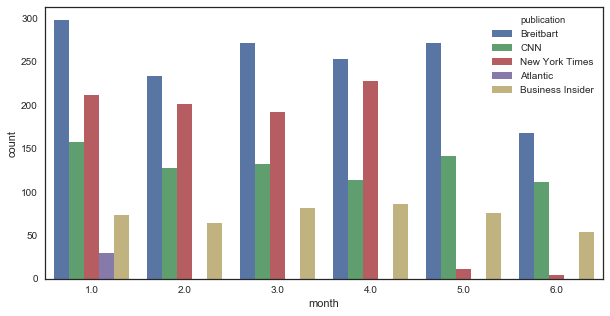

In [410]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="month", hue="publication", data=df.loc[df['year']== 2017])
plt.show()

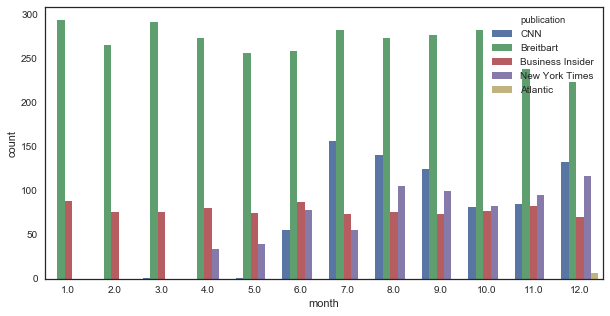

In [411]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="month", hue="publication", data=df.loc[df['year']== 2016])
plt.show()

## Create Training and Test Set

In [412]:
Y = df['title']
X = df[['publication','content']]

In [413]:
from sklearn.model_selection import train_test_split

#  Create Training and Test Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=20)

In [414]:
del X, Y

## Create Features Using tf-idf

### Create Vectorizer for articles contents 

In [415]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("Extracting features from the contents of articles in dataset using a vectorizer")
t0 = time.clock()
Xvectorizer = TfidfVectorizer(max_df=.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True, #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                             ngram_range=(1, 3)
                             )

#Find Vocab words on the whole articles 
#Applying the vectorizer to X_train and X_test
X_train_tfidf=Xvectorizer.fit_transform(X_train['content'])
X_test_tfidf=Xvectorizer.transform(X_test['content'])
vocab = Xvectorizer.vocabulary_

print('\nXvectorizer on articles contents in dataset done in '+'%s seconds'% (time.clock() - t0))


print('\nThe shape of X_train_tfidf for articles contents is:', X_train_tfidf.shape)
print('\nThe shape of X_test_tfidf for articles content is:', X_test_tfidf.shape)

Extracting features from the contents of articles in dataset using a vectorizer

Xvectorizer on articles contents in dataset done in 75.95798800000011 seconds

The shape of X_train_tfidf for articles contents is: (7500, 338978)

The shape of X_test_tfidf for articles content is: (2500, 338978)


In [416]:
gc.collect()

10318

### Create Vectorizer for articles titles

In [417]:
## Find vectorizer for titles and title and see what kind of vectorizer I need to use for each 
#(Countvectorizer)

print("Extracting features from the titles of articles in dataset using a vectorizer")
t0 = time.clock()
Yvectorizer = TfidfVectorizer(min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             use_idf=False,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True, #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                             vocabulary=vocab,
                             ngram_range=(1, 3)
                             )

#Applying the vectorizer to Y_train and Y_test

Y_train_tfidf=Yvectorizer.fit_transform(Y_train)
Y_test_tfidf=Yvectorizer.transform(Y_test)
print('\nYvectorizer on articles titles done in '+'%s seconds'% (time.clock() - t0))

print('\nThe shape of Y_train_tfidf for articles titles is:', Y_train_tfidf.shape)
print('\nThe shape of Y_test_tfidf for articles titles is:', Y_test_tfidf.shape)

Extracting features from the titles of articles in dataset using a vectorizer

Yvectorizer on articles titles done in 4.549770999999964 seconds

The shape of Y_train_tfidf for articles titles is: (7500, 338978)

The shape of Y_test_tfidf for articles titles is: (2500, 338978)


### Create Vectorizer for X_new


In [418]:
type(X_new)

pandas.core.series.Series

In [419]:
#Here we clean the content by removing all the  punctuation, 
#removing all that is unnecessary.

X_new = X_new.str.replace(r'[^a-zA-Z0-9 ]', "",).fillna('')
X_new = X_new.str.lower()
X_new = X_new.str.replace(r'Breitbart|CNN|The New York Times|Business Insider|Atlantic', "")

In [420]:
X_new

18991    berlin reuters     tens of thousands of people...
dtype: object

In [421]:
#Find Vocab words on the whole articles 
#Applying the vectorizer to X_news and X_test
X_new_tfidf=Xvectorizer.transform(X_new)
print('\nThe shape of X_new_tfidf for articles content is:', X_new_tfidf.shape)


The shape of X_new_tfidf for articles content is: (1, 338978)


In [422]:
del vocab

In [423]:
gc.collect()

0

## Clustering of titles of articles in dataset

### LSA on the titles of the articles

In [424]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer

#### LSA on the titles of the articles  10 articles

In [425]:
#Our SVD data reducer.  We are going to reduce the feature space from 84939 to 1000.
t0 = time.clock()
svd= TruncatedSVD(10, random_state = 20)
lsa = make_pipeline(svd, Normalizer(copy=False))


# Run SVD on the training data, then project the training data.
Y_train_lsa10 = lsa.fit_transform(Y_train_tfidf)
Y_test_lsa10 = lsa.transform(Y_test_tfidf)

print('LSA for 10 articles done in '+'%s seconds'% (time.clock() - t0))

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print('\nPercent variance captured by all components: ', (total_variance*100))

LSA for 10 articles done in 3.0370120000000043 seconds

Percent variance captured by all components:  5.320400698615563


In [426]:
print('The shape of Y_train_lsa for titles is:', Y_train_lsa10.shape)
print('The shape of Y_test_lsa for titles is:', Y_test_lsa10.shape)

The shape of Y_train_lsa for titles is: (7500, 10)
The shape of Y_test_lsa for titles is: (2500, 10)


In [427]:
#What are the topics in the articles looking at the biggest components articles topics.  

In [428]:
#Looking at what sorts of titles our solution considers similar, for the first five identified topics
print('For the Training set:')
titles1_by_component=pd.DataFrame(Y_train_lsa10,index=Y_train.index)
for i in range(5):
    print('Component {}:'.format(i))
    print(titles1_by_component.loc[:,i].sort_values(ascending=False)[0:3])
    
print('\nFor the Test set:')    

titles2_by_component=pd.DataFrame(Y_test_lsa10,index=Y_test.index)
for i in range(5):
    print('Component {}:'.format(i))
    print(titles2_by_component.loc[:,i].sort_values(ascending=False)[0:3])

For the Training set:
Component 0:
30778    0.966490
47148    0.965407
27063    0.963733
Name: 0, dtype: float64
Component 1:
5016     0.981777
23181    0.981603
28540    0.981310
Name: 1, dtype: float64
Component 2:
17696    0.883292
22873    0.876342
34745    0.796539
Name: 2, dtype: float64
Component 3:
46001    0.986534
661      0.980011
45155    0.979980
Name: 3, dtype: float64
Component 4:
10409    0.937106
46118    0.933026
7571     0.926196
Name: 4, dtype: float64

For the Test set:
Component 0:
25624    0.969691
1868     0.961950
17290    0.960716
Name: 0, dtype: float64
Component 1:
9481     0.980387
44518    0.979890
30089    0.979770
Name: 1, dtype: float64
Component 2:
32970    0.797566
33895    0.796773
25871    0.796704
Name: 2, dtype: float64
Component 3:
49561    0.978538
45513    0.977176
31622    0.974661
Name: 3, dtype: float64
Component 4:
40577    0.901852
32044    0.901683
670      0.896164
Name: 4, dtype: float64


In [429]:
print('The Components Value per Articles are:')
titles1_by_component.head()

The Components Value per Articles are:


,0,1,2,3,4,5,6,7,8,9
27396,0.851600,0.342187,-0.362270,-0.049839,0.073373,-0.080093,-0.040044,-0.004193,-0.086891,-0.054701
49747,0.104038,0.165357,0.014689,0.418140,0.151705,0.347540,0.298861,-0.194855,0.421914,0.581102
26513,0.224825,0.342521,0.110496,0.108915,0.444641,0.171999,0.630741,-0.067130,0.311052,0.285793
19619,0.173143,0.265229,-0.100522,0.310068,0.388326,0.198040,-0.006450,0.142994,0.213670,0.732986
1073,0.301828,0.084896,0.032707,0.506335,0.265323,0.309568,0.055576,-0.170560,0.148380,0.651017


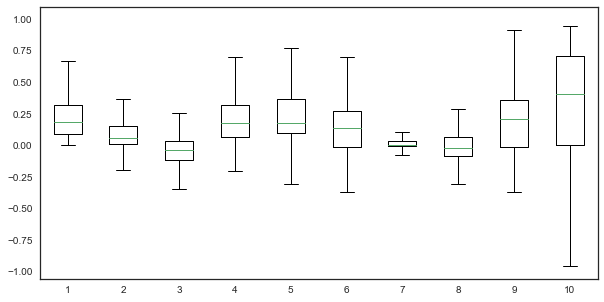

In [430]:
plt.figure(figsize=(10, 5))
plt.boxplot([titles1_by_component[0].values, titles1_by_component[1].values, titles1_by_component[2].values, titles1_by_component[3].values, titles1_by_component[4].values, titles1_by_component[5].values, titles1_by_component[6].values, titles1_by_component[7].values, titles1_by_component[8].values, titles1_by_component[9].values])
#plt.xlim(0,10)
plt.show()

# Set the axes ranges and axes labels
#plt.xlim(0,9)

#mpl_fig = plt.gcf()
#plotly_fig = tls.mpl_to_plotly( mpl_fig )
#plot_url = py.plot(plotly_fig)
#ax.set_xlim(left =0, right = 9)
#top = 9
#bottom = 0
#ax1.set_xlim(bottom, top)

They are the eigenvectors that an article title has to a BreiBart article
Is the amount of similarity that are an article has to a Breibart article. 
Every article has a value for each idealized 
Most articles should be 9 b/c of the mean of 9 is higher of any other means.  
A bunch of articles that are not Breibart articles create a negatively skewed distribution 

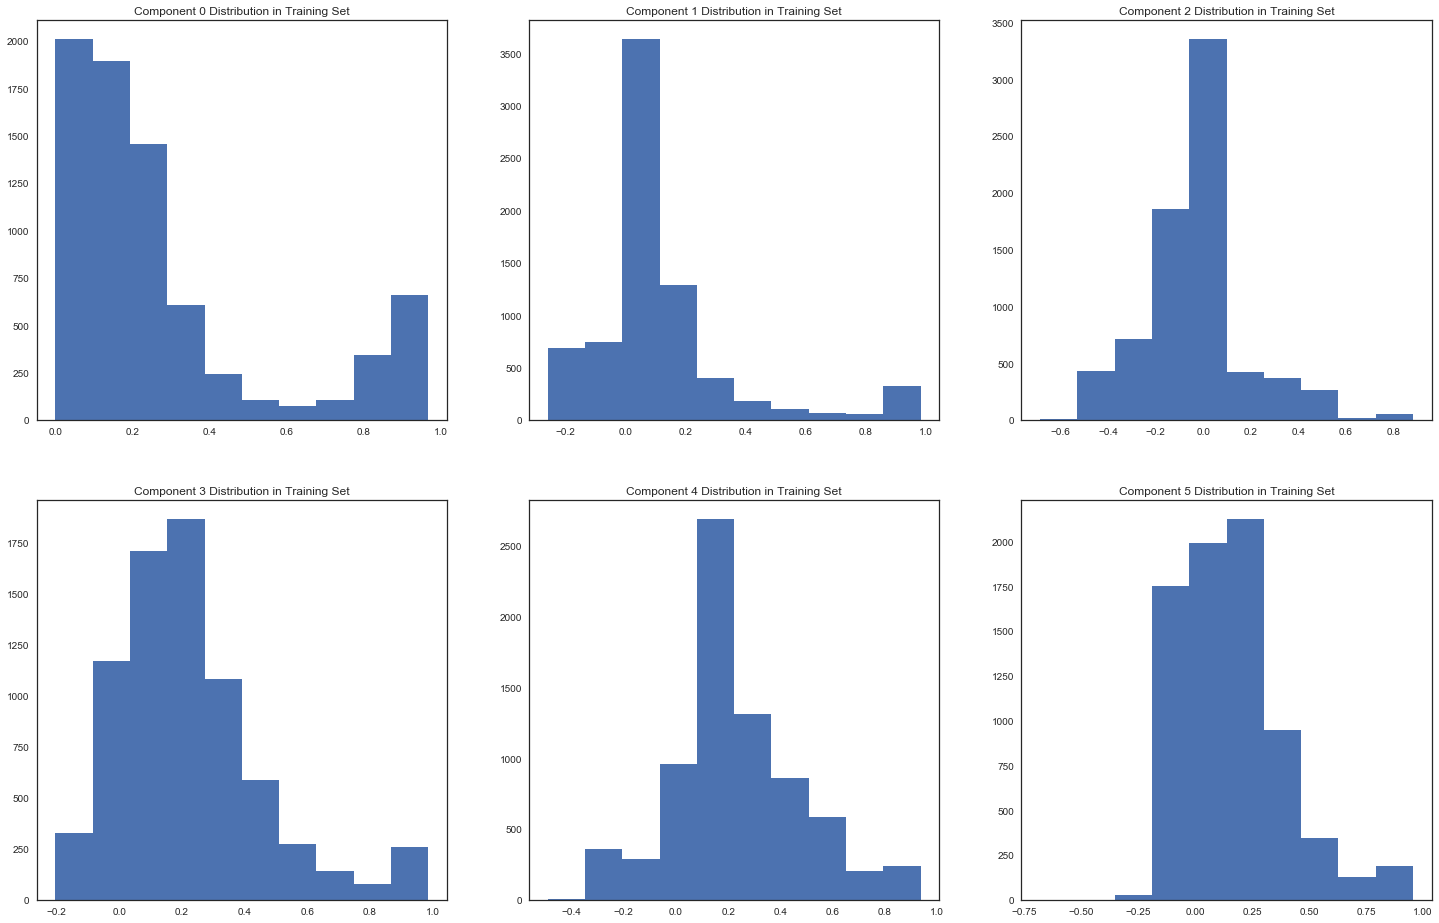

In [431]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
plt.hist(titles1_by_component[0])
plt.title('Component 0 Distribution in Training Set')
plt.subplot(3, 3, 2)
plt.hist(titles1_by_component[1])
plt.title('Component 1 Distribution in Training Set')
plt.subplot(3, 3, 3)
plt.hist(titles1_by_component[2])
plt.title('Component 2 Distribution in Training Set')
plt.subplot(3, 3, 4)
plt.hist(titles1_by_component[3])
plt.title('Component 3 Distribution in Training Set')
plt.subplot(3, 3, 5)
plt.hist(titles1_by_component[4])
plt.title('Component 4 Distribution in Training Set')
plt.subplot(3, 3, 6)
plt.hist(titles1_by_component[5])
plt.title('Component 5 Distribution in Training Set')
plt.show()

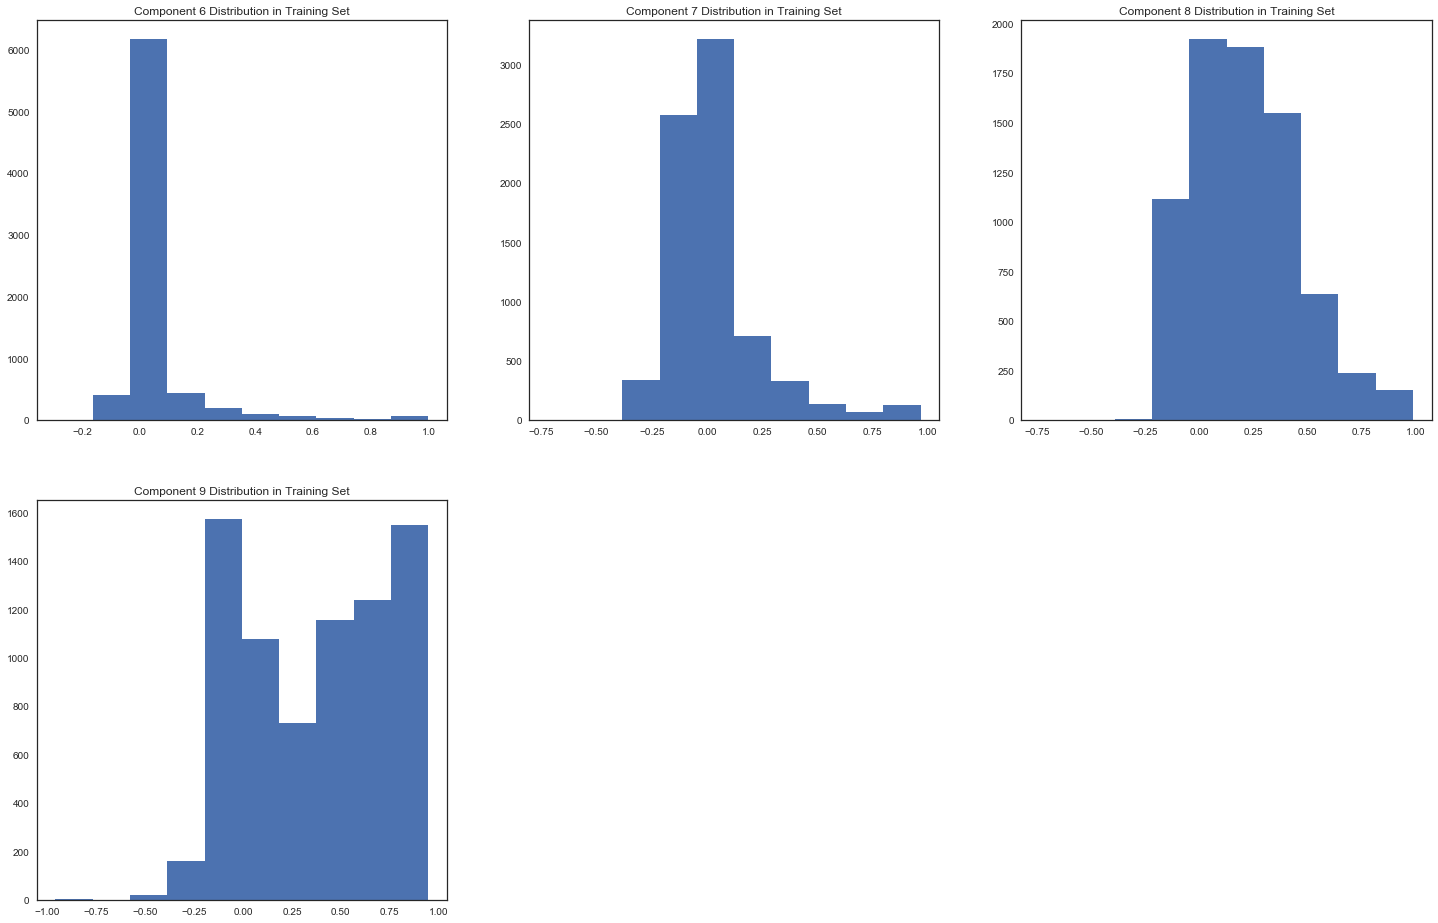

In [432]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
plt.hist(titles1_by_component[6])
plt.title('Component 6 Distribution in Training Set')
plt.subplot(3, 3, 2)
plt.hist(titles1_by_component[7])
plt.title('Component 7 Distribution in Training Set')
plt.subplot(3, 3, 3)
plt.hist(titles1_by_component[8])
plt.title('Component 8 Distribution in Training Set')
plt.subplot(3, 3, 4)
plt.hist(titles1_by_component[9])
plt.title('Component 9 Distribution in Training Set')
plt.show()

In [433]:
Component_train10 = pd.DataFrame()
Component_train10['title'] = Y_train
Component_train10['component'] = titles1_by_component.idxmax(axis=1)

In [434]:
Component_test10 = pd.DataFrame()
Component_test10['title'] = Y_test
Component_test10['component'] = titles2_by_component.idxmax(axis=1)

In [435]:
Y_train_component10 = Component_train10['component']
Y_test_component10 = Component_test10['component']

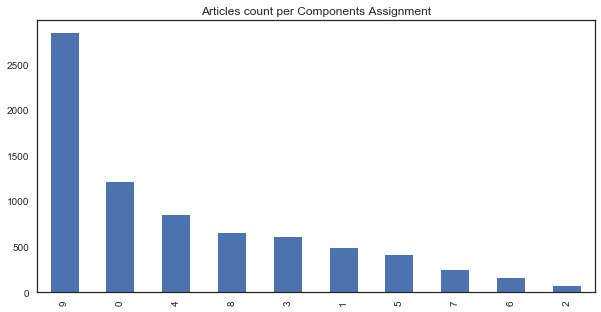

In [436]:
plt.figure(figsize=(10, 5))
Component_train10.component.value_counts().plot(kind='bar')
plt.title('Articles count per Components Assignment')
plt.show()

In [437]:
display(Component_train10.head())

,title,component
27396,trump warns hillary wants to abolish the secon...,0
49747,the 11 best laptops of 2016,9
26513,team of grifters tim kaine reinforces crooked ...,6
19619,investigation migrants smuggled into uk posing...,9
1073,a long way from mexico company bets china has ...,9


In [438]:
display(Component_test10.head())

,title,component
27594,clinton vp pick tim kaines islamist ties,1
21699,report donald trump no show at colorado state ...,0
40577,generous kidney donor triggers 6 transplants,4
28470,zumwalt fifteen years after 911 what have we l...,9
24395,texas prisoners bust out of jail to save jailer,9


In [439]:
for i in range(10):
    print("\nArticles in Component ", i)
    title_index = titles1_by_component.loc[:,i].sort_values(ascending=False)[0:3].index
    print(Component_train10.loc[title_index,['title','component']])


Articles in Component  0
                                                   title  component
30778  sad leftists protest donald trump election at ...          0
47148  the never trump movement has settled on a cand...          0
27063  donald trump spokesman nikki haley had natural...          0

Articles in Component  1
                                                   title  component
5016   russias hacks followed years of paranoia towar...          1
23181  hillary clinton next to cardinal dolan at al s...          1
28540  hillary clinton to goldman sachs i represented...          1

Articles in Component  2
                                                   title  component
17696  exclusive  the donald endorses the donald rums...          2
22873  sheriff joe the donald establishment doesnt wa...          2
34745          donald trumps risky religious pilgrimage           2

Articles in Component  3
                                                   title  component
46001  a for

In [440]:
print('\nThe shape of Y_train_tfidf for articles titles is:', Y_train_tfidf.shape)
Component_train10.component.value_counts()


The shape of Y_train_tfidf for articles titles is: (7500, 338978)


9    2839
0    1203
4     844
8     647
3     602
1     480
5     413
7     244
6     160
2      68
Name: component, dtype: int64

Here we can note that Component 7, 0 and 4 contain the most articles.     
But the articles can be seen as well distributed between the different Components. 

In [441]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_features=10,
                                stop_words='english')
t0 = time.clock()

print("Top terms per components:") 
for i in range(10):
    tf = tf_vectorizer.fit_transform(Component_train10.loc[Component_train10['component'] == i,'title'])
    print('\ntf_vectorizer on done in '+'%s seconds'% (time.clock() - t0))
    print("\nTopics in Component ", i)
    tf_feature_names = tf_vectorizer.get_feature_names()
    print(tf_feature_names)


Top terms per components:

tf_vectorizer on done in 0.09022099999992861 seconds

Topics in Component  0
['campaign', 'clinton', 'cruz', 'donald', 'hillary', 'obama', 'poll', 'president', 'says', 'trump']

tf_vectorizer on done in 0.1250199999999495 seconds

Topics in Component  1
['bernie', 'campaign', 'clinton', 'clintons', 'email', 'fbi', 'foundation', 'hillary', 'poll', 'sanders']

tf_vectorizer on done in 0.1349760000000515 seconds

Topics in Component  2
['border', 'briefing', 'change', 'debate', 'donald', 'mike', 'news', 'remarks', 'trumps', 'victory']

tf_vectorizer on done in 0.17243899999994028 seconds

Topics in Component  3
['best', 'california', 'city', 'just', 'new', 'times', 'today', 'world', 'year', 'york']

tf_vectorizer on done in 0.23314800000002833 seconds

Topics in Component  4
['america', 'ban', 'care', 'immigration', 'plan', 'president', 'russia', 'speech', 'trumps', 'wall']

tf_vectorizer on done in 0.26604100000008657 seconds

Topics in Component  5
['administr

From this there are a few things we can infer from the top 10 Components for instance:   

In Component 0:    
Most of the articles are are probably about the __Donald Trump Campaign__    
since words like: __'campaign', 'clinton', 'cruz', 'donald', 'hillary', 'obama', 'poll', 'president', 'says', 'trump'__ seem to be the most reccurent.      
Looking at some of the article titles, this is mostly about Trump's rethoric during the GOP Primary elections and the General Elections between Hillary Clinton and Donald Trump. 
Also there is some articles that talk about Trump and what he did when he became president.
One thing that reinforces this is the fact that:    
 * __Trump__ mentioned 1149 times in Component 0
 * __Donald__ mentioned 307 times in component 0

In Component 1:    
Most of the articles are are probably about the __DNC Campaign__    
since words like: __'bernie', 'campaign', 'clinton', 'clintons', 'email', 'fbi', 'foundation', 'hillary', 'poll', 'sanders'__ to be the most reccurent.          
Looking at some of the articles titles, this is mostly about the Hillary Clinton during the DNC Primary and the challenge Bernie Sanders was for her nonimantaion. We also have a lot of mentions of her e-mails, the Clinton foundation (17) other articles about Hillary Clintons after she won the DNC primary elections.
One thing that reinforces this is the fact that:   
  * __Clinton__ mentioned 293 times in Component 0
  * __Hillary__ mentioned 227 times in component 0   

In Component 2:    
Most of the articles are are probably about the __Donald Trump's Win__    
since words like: __'border', 'briefing', 'change', 'debate', 'donald', 'mike', 'news', 'remarks', 'trumps', 'victory'__ seem to be the most reccurent.   
There are articles abut Donald Trump Victory, is inauguration speech, the woman's March and he starting to set up his governement.
One thing that reinforces this is the fact that: 
 * __Donald__ mentioned 57 times in Component 2
 * __Trumps__ mentioned 55 times in component 2

In Component 3:    
Most of the articles are are probably about the __New York Related News__    
since words like: __'best', 'california', 'city', 'just', 'new', 'times', 'today', 'world', 'year', 'york'__ seem to be the most reccurent.      
There is about 73 news articles about New York and 11 about the New York Times.   
There is also about quite a few about California (22) and California Today (10).
One thing that reinforces this is the fact that:   
  * __new__ mentioned 293 times in Component 3
  * __york__ mentioned 73 times in component 3   

In Component 4:    
Most of the articles are are probably about __Trump's America First Policies__    
since words like: __'america', 'ban', 'care', 'immigration', 'plan', 'president', 'russia', 'speech', 'trumps', 'wall__ seem to be the most reccurent.     
The news articles seem to have a lot of emphasis on building the wall, the travel Ban, getting rid of health care and Trump's America first rhetoric.
There is also some articles about different topics related to Russia.
One thing that reinforces this is the fact that:
  * __Trumps__ mentioned 195 times in Component 4
  * __America__ mentioned 52 times in component 4   

In Component 5:    
Most of the articles are are probably about __The Obama Administration__    
since words like: __'administration', 'control', 'dallas', 'democrats', 'gun', 'israel', 'obama', 'syria', 'syrian', 'war'__ seem to be the most reccurent.   
While most of the articles are about the Obama administration (172 News articles), they are also quite a few articles about Gun Control and Israel, Syria and what those topics like were during the Obama presidency or during the 2016 election.  
One thing that reinforces this is the fact that:
  * __Obama__ mentioned 172 times in Component 5
  * __syria__ mentioned 36 times in component 5 

In Component 6:    
Most of the articles are are probably about the __US Supreme Court__    
since words like: __'cia', 'court', 'david', 'facts', 'fast', 'game', 'national', 'review', 'supreme', 'young'__ seem to be the most reccurent.   
This is mostly about the US Supreme court and they are quite a few arrticles that are about Fast Facts.
One thing that reinforces this is the fact that:
  * __court__ mentioned 27 times in Component 6
  * __supreme__ mentioned 15 times in component 6 

In Component 7:    
Most of the articles are are probably about the __White House and Health Care__    
since words like: __'care', 'gop', 'health', 'house', 'jared', 'kushner', 'obamacare', 'repeal', 'trump', 'white'__ seem to be the most reccurent.    
They are news articles about the happenings at the White house with articles about the Gop and their health care proposal(ryan care) and they wanting to repeal obamacare.
One thing that reinforces this is the fact that:
  * __house__ mentioned 111 times in Component 7
  * __white__ mentioned 108 times in component 7
  * __care__ mentioned 48 times in Component 7
  * __Obamacare__ mentioned 38 times in component 7


In Component 8:    
Most of the articles are are probably about the __Ted Cruz Primary Campaign__      
since words like: __'campaign', 'carolina', 'cruz', 'gop', 'race', 'rubio', 'south', 'ted', 'vote', 'watch'__ seem to be the most reccurent.    
Most of the articles seem to be about Ted Cruz during the GOP Primary campaign and people other that Trump attacking Ted Cruz. This seems to be mostly about Ted Cruz vs Marco Rubio. There is also some mention of Trump here.    
One thing that reinforces this is the fact that:
  * __Ted__ mentioned 83 times in component 8
  * __cruz__ mentioned 80 times in Component 8
  

In Component 9:    
Most of the articles are are probably about the __Fear Mongering against Immigrant__       
since words like: __'attack', 'border', 'man', 'milo', 'news', 'police', 'report', 'says', 'state', 'texas'__ seem to be the most reccurent.  Most of the articles seem to be about attack perpetuated by immigrant in the US, about gun violence with some violence in the taliban also mentioned. Mexican and Muslim seem to be most of the people involved in the crime and violence mentioned.   

One thing that reinforces this is the fact that:
  * __man__ mentioned 282 times in Component 9
  * __police__ mentioned 135 times in component 9
  * __attack__ mentioned 121 times in component 9
  * __state__ mentioned 109 times in component 9
  * __border__ mentioned 76 times in component 9
  

In [442]:
Component_train10.loc[Component_train10['title'].str.contains('trumps'),'component'].value_counts()

4    195
2     55
3      9
7      5
1      4
8      3
Name: component, dtype: int64

In [443]:
Component_train10.loc[Component_train10['component']== 0][Component_train10['title'].str.contains('donald')]

,title,component
35779,is donald trump right about hillary clinton,0
16977,panic hollywood 100 celebs pledge to stop dang...,0
21171,donald trump making americas energy policy che...,0
12310,at boeing donald trump highlights jobs first a...,0
21276,in search of donald trump democrats,0
4337,cut ties to donald trump big donors urge rnc,0
4953,donald trump rex tillerson aleppo your morning...,0
4598,donald trump after fits and starts focuses on ...,0
22954,donald trump wins massachusetts in a big way,0
17084,obama challenges paul ryan and mitch mcconnell...,0


In [444]:
Component_train10.loc[X_train['publication']=='Breitbart', 'component'].value_counts()

9    1302
0     681
8     353
4     351
1     322
5     196
3     148
7     116
6      34
2      25
Name: component, dtype: int64

In [445]:
X_train.loc[Component_train10['component']== 6,'publication'].value_counts()

CNN                 78
New York Times      36
Breitbart           34
Business Insider    12
Name: publication, dtype: int64

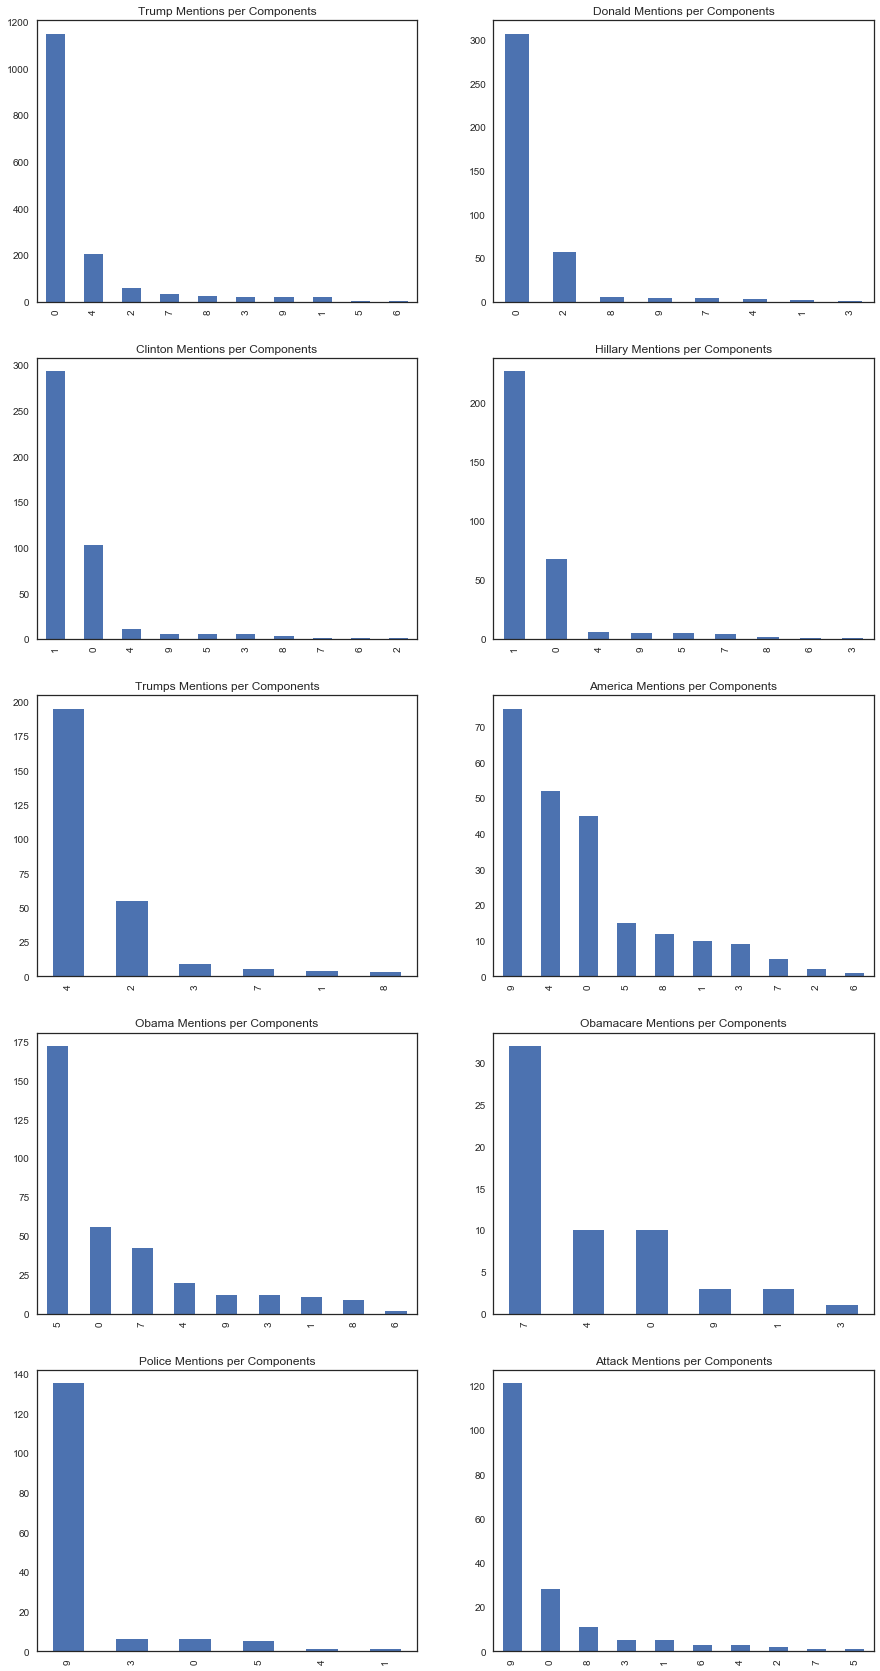

In [446]:
plt.figure(figsize=(15, 30))
plt.subplot(5, 2, 1)
Component_train10.loc[Component_train10['title'].str.contains('trump'),'component'].value_counts().plot(kind='bar')
plt.title('Trump Mentions per Components')
plt.subplot(5, 2, 2)
Component_train10.loc[Component_train10['title'].str.contains('donald'),'component'].value_counts().plot(kind='bar')
plt.title('Donald Mentions per Components')

plt.subplot(5, 2, 3)
Component_train10.loc[Component_train10['title'].str.contains('clinton'),'component'].value_counts().plot(kind='bar')
plt.title('Clinton Mentions per Components')
plt.subplot(5, 2, 4)
Component_train10.loc[Component_train10['title'].str.contains('hillary'),'component'].value_counts().plot(kind='bar')
plt.title('Hillary Mentions per Components')


plt.subplot(5, 2, 5)
Component_train10.loc[Component_train10['title'].str.contains('trumps'),'component'].value_counts().plot(kind='bar')
plt.title('Trumps Mentions per Components')
plt.subplot(5, 2, 6)
Component_train10.loc[Component_train10['title'].str.contains('america'),'component'].value_counts().plot(kind='bar')
plt.title('America Mentions per Components')

plt.subplot(5, 2, 7)
Component_train10.loc[Component_train10['title'].str.contains('obama'),'component'].value_counts().plot(kind='bar')
plt.title('Obama Mentions per Components')
plt.subplot(5, 2, 8)
Component_train10.loc[Component_train10['title'].str.contains('obamacare'),'component'].value_counts().plot(kind='bar')
plt.title('Obamacare Mentions per Components')

plt.subplot(5, 2, 9)
Component_train10.loc[Component_train10['title'].str.contains('police'),'component'].value_counts().plot(kind='bar')
plt.title('Police Mentions per Components')
plt.subplot(5, 2, 10)
Component_train10.loc[Component_train10['title'].str.contains('attack'),'component'].value_counts().plot(kind='bar')
plt.title('Attack Mentions per Components')


plt.show()

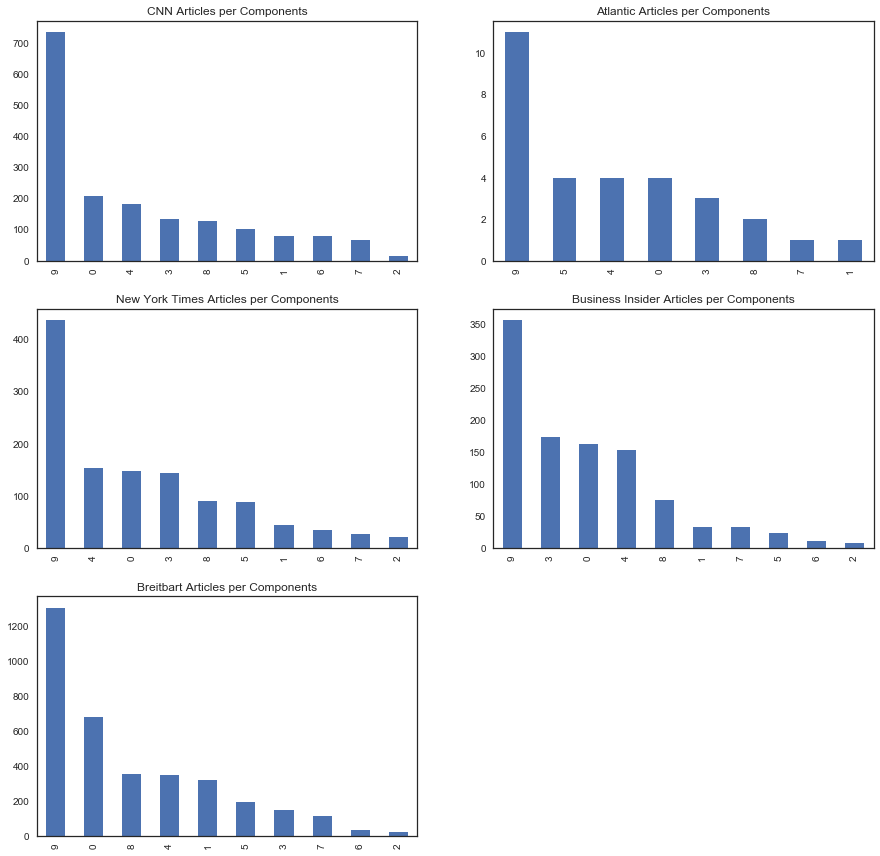

In [447]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
Component_train10.loc[X_train['publication']=='CNN', 'component'].value_counts().plot(kind='bar')
plt.title('CNN Articles per Components')
plt.subplot(3, 2, 2)
Component_train10.loc[X_train['publication']=='Atlantic', 'component'].value_counts().plot(kind='bar')
plt.title('Atlantic Articles per Components')
plt.subplot(3, 2, 3)
Component_train10.loc[X_train['publication']=='New York Times', 'component'].value_counts().plot(kind='bar')
plt.title('New York Times Articles per Components')
plt.subplot(3, 2, 4)
Component_train10.loc[X_train['publication']=='Business Insider', 'component'].value_counts().plot(kind='bar')
plt.title('Business Insider Articles per Components')
plt.subplot(3, 2, 5)
Component_train10.loc[X_train['publication']=='Breitbart', 'component'].value_counts().plot(kind='bar')
plt.title('Breitbart Articles per Components')
plt.show()

In [448]:
### value counts of each components

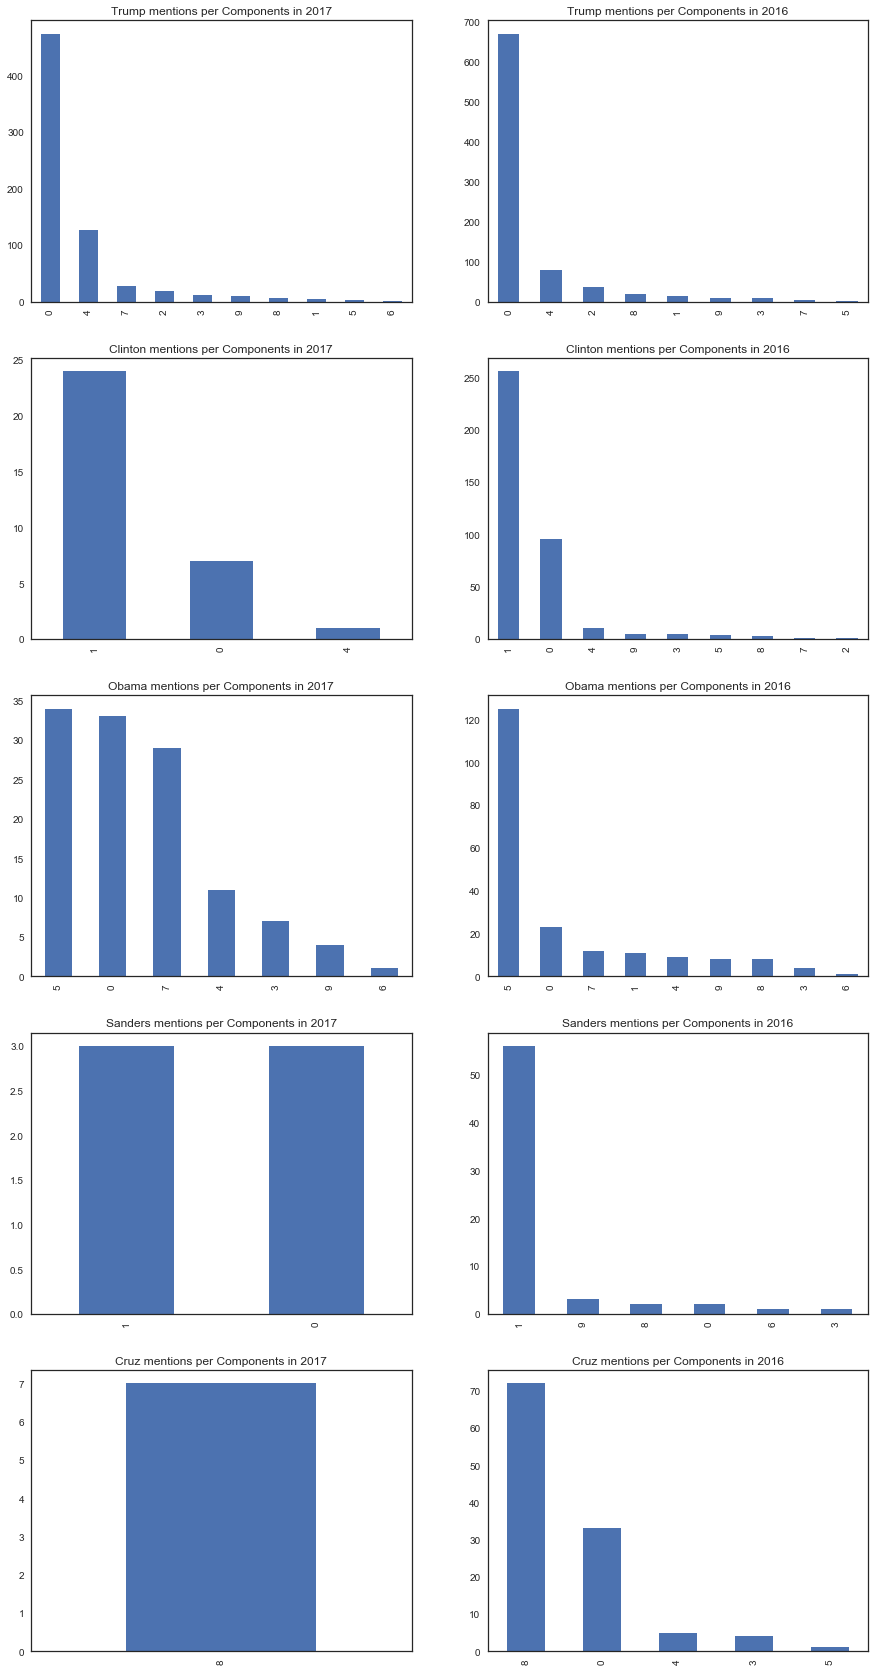

In [449]:
plt.figure(figsize=(15, 30))
plt.subplot(5, 2, 1)
Component_train10.loc[(df['year']==2017) & (Component_train10['title'].str.contains('trump')), 'component'].value_counts().plot(kind='bar')
plt.title('Trump mentions per Components in 2017')
plt.subplot(5, 2, 2)
Component_train10.loc[(df['year']==2016) & (Component_train10['title'].str.contains('trump')), 'component'].value_counts().plot(kind='bar')
plt.title('Trump mentions per Components in 2016')

plt.subplot(5, 2, 3)
Component_train10.loc[(df['year']==2017) & (Component_train10['title'].str.contains('clinton')), 'component'].value_counts().plot(kind='bar')
plt.title('Clinton mentions per Components in 2017')
plt.subplot(5, 2, 4)
Component_train10.loc[(df['year']==2016) & (Component_train10['title'].str.contains('clinton')), 'component'].value_counts().plot(kind='bar')
plt.title('Clinton mentions per Components in 2016')

plt.subplot(5, 2, 5)
Component_train10.loc[(df['year']==2017) & (Component_train10['title'].str.contains('obama')), 'component'].value_counts().plot(kind='bar')
plt.title('Obama mentions per Components in 2017')
plt.subplot(5, 2, 6)
Component_train10.loc[(df['year']==2016) & (Component_train10['title'].str.contains('obama')), 'component'].value_counts().plot(kind='bar')
plt.title('Obama mentions per Components in 2016')


plt.subplot(5, 2, 7)
Component_train10.loc[(df['year']==2017) & (Component_train10['title'].str.contains('sanders')), 'component'].value_counts().plot(kind='bar')
plt.title('Sanders mentions per Components in 2017')
plt.subplot(5, 2, 8)
Component_train10.loc[(df['year']==2016) & (Component_train10['title'].str.contains('sanders')), 'component'].value_counts().plot(kind='bar')
plt.title('Sanders mentions per Components in 2016')

plt.subplot(5, 2, 9)
Component_train10.loc[(df['year']==2017) & (Component_train10['title'].str.contains('cruz')), 'component'].value_counts().plot(kind='bar')
plt.title('Cruz mentions per Components in 2017')
plt.subplot(5, 2, 10)
Component_train10.loc[(df['year']==2016) & (Component_train10['title'].str.contains('cruz')), 'component'].value_counts().plot(kind='bar')
plt.title('Cruz mentions per Components in 2016')
plt.show()

#### LSA on the titles of the articles  3 articles

In [450]:
#Our SVD data reducer.  We are going to reduce the feature space from 84939 to 1000.
t0 = time.clock()
svd= TruncatedSVD(3)
lsa = make_pipeline(svd, Normalizer(copy=False))


# Run SVD on the training data, then project the training data.
Y_train_lsa3 = lsa.fit_transform(Y_train_tfidf)
Y_test_lsa3 = lsa.transform(Y_test_tfidf)

print('LSA for 3 articles done in '+'%s seconds'% (time.clock() - t0))

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print('\nPercent variance captured by all components: ', (total_variance*100))

LSA for 3 articles done in 1.6129090000001725 seconds

Percent variance captured by all components:  2.9094263238265907


In [451]:
print('The shape of Y_train_lsa for titles is:', Y_train_lsa3.shape)
print('The shape of Y_test_lsa for titles is:', Y_test_lsa3.shape)

The shape of Y_train_lsa for titles is: (7500, 3)
The shape of Y_test_lsa for titles is: (2500, 3)


In [452]:
#What are the topics in the articles looking at the biggest components articles topics.  

In [453]:
#Looking at what sorts of titles our solution considers similar, for the first five identified topics
print('For the Training set:')
titles1_by_component2=pd.DataFrame(Y_train_lsa3,index=Y_train.index)
for i in range(3):
    print('Component {}:'.format(i))
    print(titles1_by_component2.loc[:,i].sort_values(ascending=False)[0:3])
    
print('\nFor the Test set:')    

titles2_by_component2=pd.DataFrame(Y_test_lsa3,index=Y_test.index)
for i in range(3):
    print('Component {}:'.format(i))
    print(titles2_by_component2.loc[:,i].sort_values(ascending=False)[0:3])

For the Training set:
Component 0:
32295    0.999989
7399     0.999903
9830     0.999869
Name: 0, dtype: float64
Component 1:
33160    0.994000
33924    0.992679
46248    0.991060
Name: 1, dtype: float64
Component 2:
4793     0.998797
47668    0.995831
46690    0.994248
Name: 2, dtype: float64

For the Test set:
Component 0:
4510     0.999876
21402    0.999831
28595    0.999700
Name: 0, dtype: float64
Component 1:
36330    0.995026
35617    0.994310
46597    0.987889
Name: 1, dtype: float64
Component 2:
40437    0.991246
32002    0.989934
19199    0.989649
Name: 2, dtype: float64


In [454]:
print('The Components Value per Articles are:')
titles1_by_component2.head()

The Components Value per Articles are:


,0,1,2
27396,0.862915,0.346258,-0.368081
49747,0.531014,0.847255,0.013515
26513,0.532046,0.809791,0.247317
19619,0.517324,0.794489,-0.318063
1073,0.960454,0.267125,0.078557


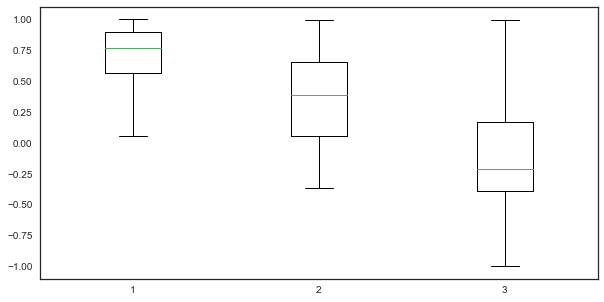

In [455]:
plt.figure(figsize=(10, 5))
plt.boxplot([titles1_by_component2[0].values, titles1_by_component2[1].values, titles1_by_component2[2].values])
plt.show()

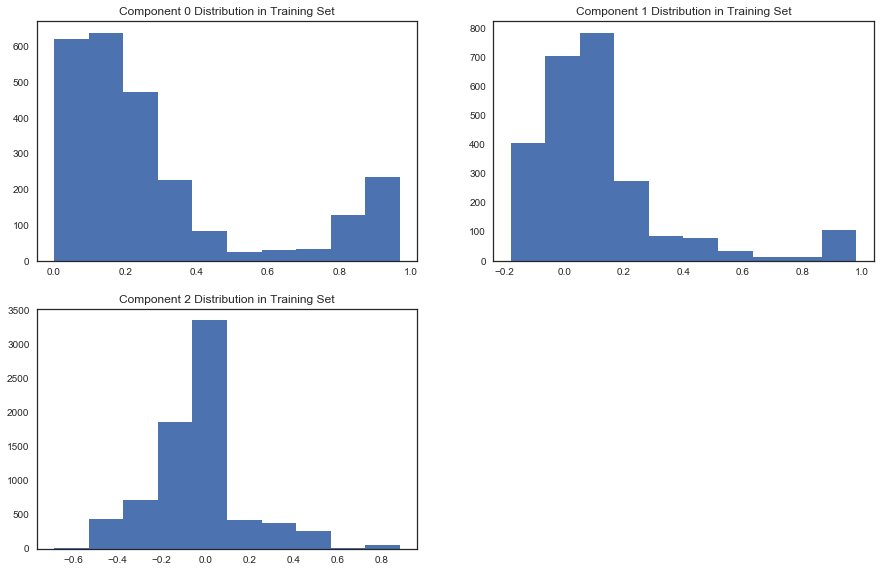

In [456]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
plt.hist(titles2_by_component[0])
plt.title('Component 0 Distribution in Training Set')
plt.subplot(3, 2, 2)
plt.hist(titles2_by_component[1])
plt.title('Component 1 Distribution in Training Set')
plt.subplot(3, 2, 3)
plt.hist(titles1_by_component[2])
plt.title('Component 2 Distribution in Training Set')
plt.show()

In [457]:
Component_train3 = pd.DataFrame()
Component_train3['title'] = Y_train
Component_train3['component'] = titles1_by_component2.idxmax(axis=1)

In [458]:
Component_test3 = pd.DataFrame()
Component_test3['title'] = Y_test
Component_test3['component'] = titles2_by_component2.idxmax(axis=1)

In [459]:
Y_train_component3 = Component_train3['component']
Y_test_component3 = Component_test3['component']

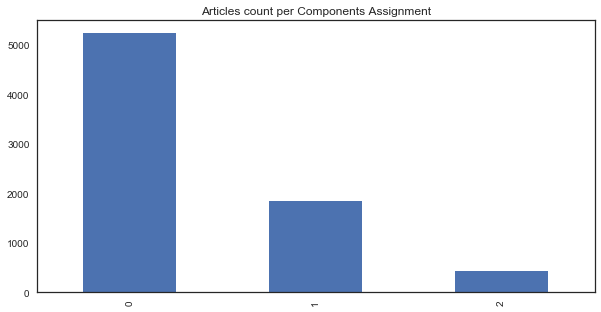

In [460]:
plt.figure(figsize=(10, 5))
Component_train3.component.value_counts().plot(kind='bar')
plt.title('Articles count per Components Assignment')
plt.show()

In [461]:
display(Component_train3.head())

,title,component
27396,trump warns hillary wants to abolish the secon...,0
49747,the 11 best laptops of 2016,1
26513,team of grifters tim kaine reinforces crooked ...,1
19619,investigation migrants smuggled into uk posing...,1
1073,a long way from mexico company bets china has ...,0


In [462]:
display(Component_test3.head())

,title,component
27594,clinton vp pick tim kaines islamist ties,1
21699,report donald trump no show at colorado state ...,0
40577,generous kidney donor triggers 6 transplants,0
28470,zumwalt fifteen years after 911 what have we l...,1
24395,texas prisoners bust out of jail to save jailer,1


In [463]:
for i in range(3):
    print("\nArticles in Component ", i)
    title_index = titles1_by_component2.loc[:,i].sort_values(ascending=False)[0:3].index
    print(Component_train3.loc[title_index,['title','component']])


Articles in Component  0
                                                   title  component
32295  as mattis prepares for asia visit north korea ...          0
7399   antnio guterres pledges to help vulnerable as ...          0
9830   rep pete roskam post ryancare congress must st...          0

Articles in Component  1
                                                   title  component
33160           the disease that could bankrupt medicare          1
33924                 comedian charlie murphy dies at 57          1
46248  retailers are clamoring over a specific kind o...          1

Articles in Component  2
                                                   title  component
4793                               we are orphans here            2
47668  the mclaren 675lt is the hightech supercar for...          2
46690         how to be assertive rather than aggressive          2


In [464]:
## This is noise so it is too few topics so a lot of different articles are put together   

In [465]:
print('\nThe shape of Y_train_tfidf for articles titles is:', Y_train_tfidf.shape)
Component_train3.component.value_counts()


The shape of Y_train_tfidf for articles titles is: (7500, 338978)


0    5230
1    1833
2     437
Name: component, dtype: int64

Component 0 has the most articles       
The articles can be seen as well distributed between the different Components. 

In [466]:
tf_vectorizer = CountVectorizer(max_features=10,
                                stop_words='english')
t0 = time.clock()

print("Top terms per components:") 
for i in range(3):
    tf = tf_vectorizer.fit_transform(Component_train3.loc[Component_train3['component'] == i,'title'])
    print('\ntf_vectorizer on done in '+'%s seconds'% (time.clock() - t0))
    print("\nTopics in Component ", i)
    tf_feature_names = tf_vectorizer.get_feature_names()
    print(tf_feature_names)


Top terms per components:

tf_vectorizer on done in 0.26902400000017224 seconds

Topics in Component  0
['cruz', 'donald', 'gop', 'house', 'obama', 'president', 'report', 'says', 'trump', 'white']

tf_vectorizer on done in 0.36049100000013823 seconds

Topics in Component  1
['campaign', 'clinton', 'facts', 'hillary', 'new', 'police', 'sanders', 'state', 'years', 'york']

tf_vectorizer on done in 0.384021999999959 seconds

Topics in Component  2
['america', 'ban', 'donald', 'election', 'immigration', 'new', 'speech', 'trumps', 'twitter', 'wall']



tf_vectorizer on done in 0.1899660000000125 seconds

Topics in Component  1
['campaign', 'clinton', 'facts', 'fast', 'hillary', 'new', 'sanders', 'state', 'years', 'york']

tf_vectorizer on done in 0.21240100000001405 seconds

Topics in Component  2
['ban', 'donald', 'election', 'facebook', 'immigration', 'new', 'speech', 'trumps', 'twitter', 'wall']

From this there are a few things we can infer from the top 3 Components for instance:   

In Component 0:    
Most of the articles are are probably about __Trump During and after Elections__    
since words like: __'cruz', 'donald', 'gop', 'house', 'obama', 'police', 'report', 'says', 'trump', 'white'__ seem to be the most reccurent.    
There seems to be a lot of articles about Donald Trump and Barack Obama during the campaign and after the elections.    
Some are about Obama's polycies and them being attacked by Trump and Ted Cruz and some about his decisions.
Others are about Donald Trump during the campaign and after he became president of the US.  
Mostly about the repeal of Obamacare 

 * __Trump__ mentioned 1232 times in Component 0
 * __Donald__ mentioned 318 times in component 0

In Component 1:    
Most of the articles are are probably about  __Hilary Clinton During and after Elections__     
campaign election focus on the Democratic side since words like: __'campaign', 'clinton', 'facts', 'fast', 'hillary', 'new', 'sanders', 'state', 'years', 'york'__ to be the most reccurent.   
Here there seems to about the Primary campaign election focus on the Democratic side because most of the articles talk about Bernie Sanders vs Hillary Clinton. 
There is clearly a bigger emphasis on Hillary Clinon with reference to the FBI investigations, and critics of the Clinton Campaign.  
 * __Clinton__ mentioned 314 times in Component 1
 * __Hillary__ mentioned 239 times in component 1

In Component 2:    
Most of the articles are are probably about __ Trumps and other topics__ 


since words like: __'ban', 'donald', 'election', 'facebook', 'immigration', 'new', 'speech', 'trumps', 'twitter', 'wall'__ seem to be the most reccurent.    
While Most of the topics seems to be about Trump presidency and trying to implement his policy,like the travel ban, building the wall and his immagration stance, there are some articles that still relate to the Primary campaign.  
This contains a larger fraction of the articles are topics that my model is not able to seperate out.
 * __trumps__ mentioned 259 times in Component 2
 

In [467]:
Component_train3.loc[Component_train3['title'].str.contains('wall'),'component'].value_counts()

0    61
2    11
1     9
Name: component, dtype: int64

In [468]:
Component_train3.loc[Component_train3['component']== 2][Component_train3['title'].str.contains('facebook')]

,title,component
39947,facebook parenting can backfire,2
45586,donald trumps seemingly crazy claim about amer...,2
30436,cpac organizers call for congressional action ...,2
30261,facebook bans admin who supported trumps immig...,2
28778,trumps facebook interaction more than doubles ...,2
19036,facebook sued for scanning user messages for a...,2
49254,facebook is being blamed for trumps election ...,2
49132,now facebook plans to eat the 500 billion tele...,2
13484,soros board member create government version o...,2


In [469]:
Component_train3.loc[X_train['publication']=='CNN', 'component'].value_counts()

0    1150
1     466
2     106
Name: component, dtype: int64

In [470]:
X_train.loc[Component_train3['component']== 1,'publication'].value_counts()

Breitbart           809
CNN                 466
New York Times      306
Business Insider    242
Atlantic             10
Name: publication, dtype: int64

In [471]:
#Search other words and see if what topics these are in as way to narrow down topics. 

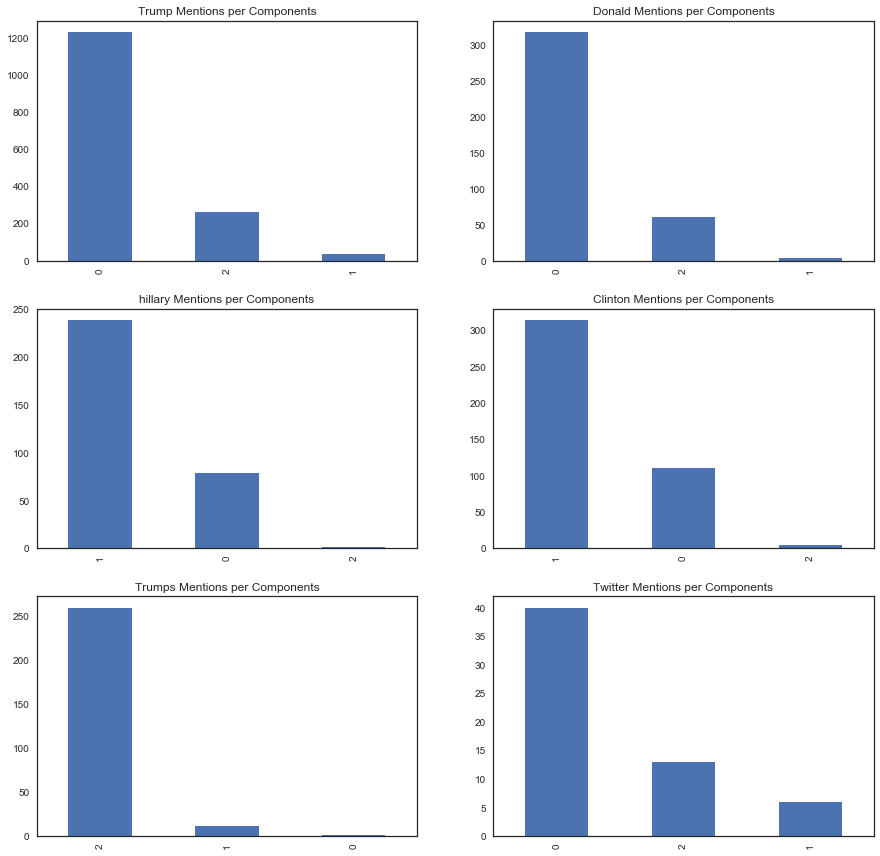

In [472]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
Component_train3.loc[Component_train3['title'].str.contains('trump'),'component'].value_counts().plot(kind='bar')
plt.title('Trump Mentions per Components')
plt.subplot(3, 2, 2)
Component_train3.loc[Component_train3['title'].str.contains('donald'),'component'].value_counts().plot(kind='bar')
plt.title('Donald Mentions per Components')


plt.subplot(3, 2, 3)
Component_train3.loc[Component_train3['title'].str.contains('hillary'),'component'].value_counts().plot(kind='bar')
plt.title('hillary Mentions per Components')
plt.subplot(3, 2, 4)
Component_train3.loc[Component_train3['title'].str.contains('clinton'),'component'].value_counts().plot(kind='bar')
plt.title('Clinton Mentions per Components')


plt.subplot(3, 2, 5)
Component_train3.loc[Component_train3['title'].str.contains('trumps'),'component'].value_counts().plot(kind='bar')
plt.title('Trumps Mentions per Components')
plt.subplot(3, 2, 6)
Component_train3.loc[Component_train3['title'].str.contains('twitter'),'component'].value_counts().plot(kind='bar')
plt.title('Twitter Mentions per Components')
plt.show()

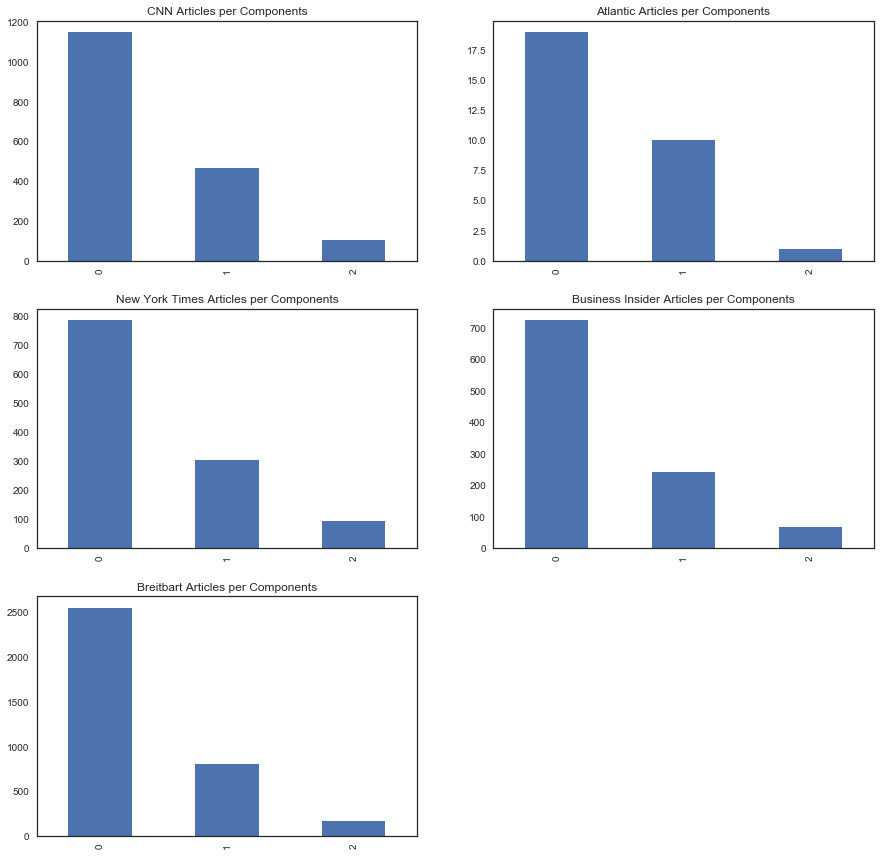

In [473]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
Component_train3.loc[X_train['publication']=='CNN', 'component'].value_counts().plot(kind='bar')
plt.title('CNN Articles per Components')
plt.subplot(3, 2, 2)
Component_train3.loc[X_train['publication']=='Atlantic', 'component'].value_counts().plot(kind='bar')
plt.title('Atlantic Articles per Components')
plt.subplot(3, 2, 3)
Component_train3.loc[X_train['publication']=='New York Times', 'component'].value_counts().plot(kind='bar')
plt.title('New York Times Articles per Components')
plt.subplot(3, 2, 4)
Component_train3.loc[X_train['publication']=='Business Insider', 'component'].value_counts().plot(kind='bar')
plt.title('Business Insider Articles per Components')
plt.subplot(3, 2, 5)
Component_train3.loc[X_train['publication']=='Breitbart', 'component'].value_counts().plot(kind='bar')
plt.title('Breitbart Articles per Components')
plt.show()

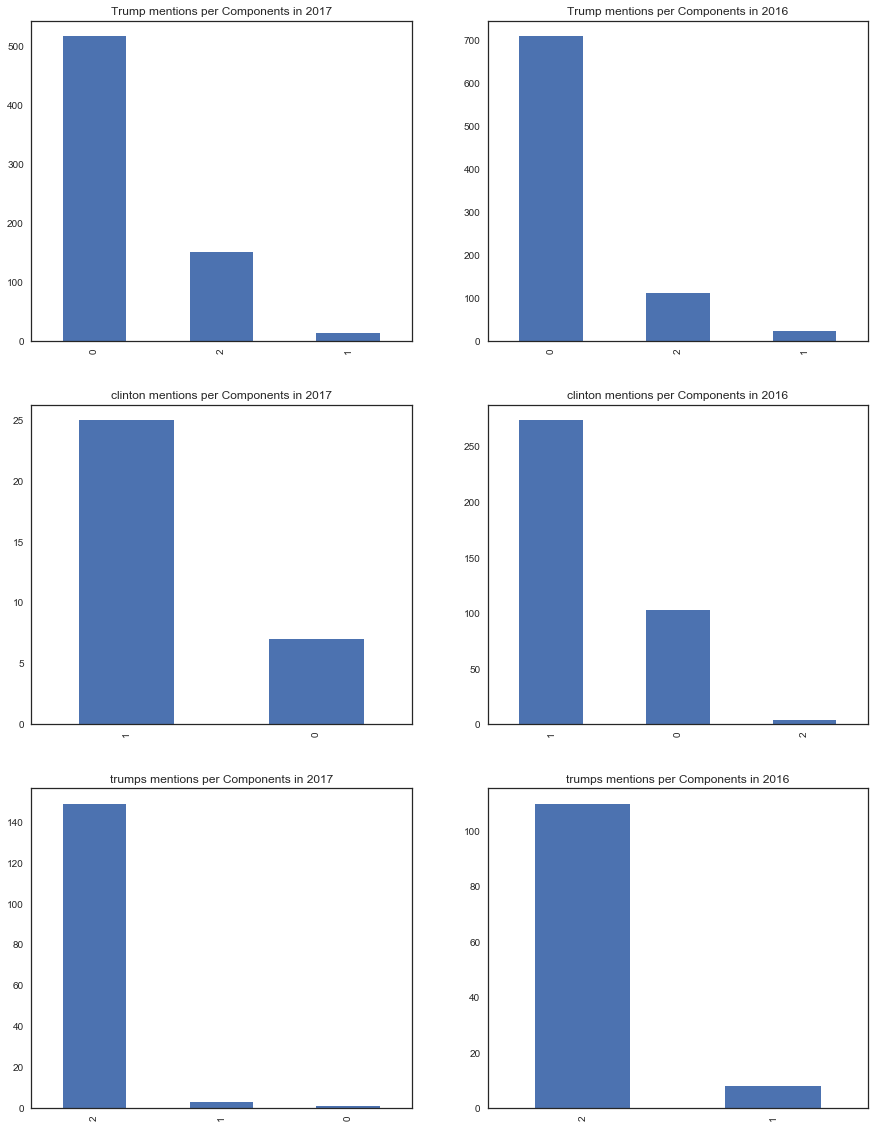

In [474]:
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
Component_train3.loc[(df['year']==2017) & (Component_train3['title'].str.contains('trump')), 'component'].value_counts().plot(kind='bar')
plt.title('Trump mentions per Components in 2017')
plt.subplot(3, 2, 2)
Component_train3.loc[(df['year']==2016) & (Component_train3['title'].str.contains('trump')), 'component'].value_counts().plot(kind='bar')
plt.title('Trump mentions per Components in 2016')


plt.subplot(3, 2, 3)
Component_train3.loc[(df['year']==2017) & (Component_train3['title'].str.contains('clinton')), 'component'].value_counts().plot(kind='bar')
plt.title('clinton mentions per Components in 2017')
plt.subplot(3, 2, 4)
Component_train3.loc[(df['year']==2016) & (Component_train3['title'].str.contains('clinton')), 'component'].value_counts().plot(kind='bar')
plt.title('clinton mentions per Components in 2016')

plt.subplot(3, 2, 5)
Component_train3.loc[(df['year']==2017) & (Component_train3['title'].str.contains('trumps')), 'component'].value_counts().plot(kind='bar')
plt.title('trumps mentions per Components in 2017')
plt.subplot(3, 2, 6)
Component_train3.loc[(df['year']==2016) & (Component_train3['title'].str.contains('trumps')), 'component'].value_counts().plot(kind='bar')
plt.title('trumps mentions per Components in 2016')
plt.show()

In [475]:
#Component_train3.loc[Component_train3['component']== 2][(Component_train3['title'].str.contains('trumps'))&& (Component_train3['title'].str.contains('clinton'))]

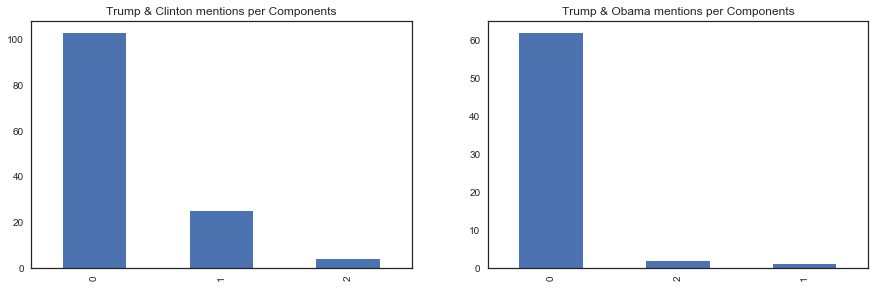

In [476]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
Component_train3.loc[(Component_train3['title'].str.contains('trump')) & (Component_train3['title'].str.contains('clinton')), 'component'].value_counts().plot(kind='bar')
plt.title('Trump & Clinton mentions per Components')
plt.subplot(2, 2, 2)
Component_train3.loc[(Component_train3['title'].str.contains('trump')) & (Component_train3['title'].str.contains('obama')), 'component'].value_counts().plot(kind='bar')
plt.title('Trump & Obama mentions per Components')
plt.show()

In [477]:
Component_train3['component'].value_counts()

0    5230
1    1833
2     437
Name: component, dtype: int64

## Random Forest to check what's going 

In [102]:
from sklearn import ensemble

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

### Random Forest with 10 articles

We are going to boost the weight of the components with the least amount of articles.  

In [103]:
# Set the start time for execution speed.
import time
start_time = time.clock() 
#weighting = {0:1,1:3,2:2,3:5,4:1,5:5,6:6,7:1,8:7,9:5}

rfc = ensemble.RandomForestClassifier(max_depth=5,max_features='auto', n_estimators=1500,
                                      class_weight = "balanced")

rfc.fit(X_train_tfidf, Y_train_component10)


print('Runtime for Random Forest: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on  Training Set: ' + str(rfc.score(X_train_tfidf, Y_train_component10)))

print('\nScore on  Test Set: ' + str(rfc.score(X_test_tfidf, Y_test_component10)))

cv_train = cross_val_score(rfc, X_train_tfidf, Y_train_component10, cv=5)

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))

Runtime for Random Forest: 14.207149999999999 seconds

Score on  Training Set: 0.5577333333333333

Score on  Test Set: 0.4624

Cross validation results: 48.014% ± 0.397% 
 
 [0.47571524 0.47571524 0.4823451  0.48598131 0.48093645]


__max_depth=25,max_features='auto', n_estimators=200,class_weight = None__   

Runtime for Random Forest: 31.428160999999932 seconds   

Score on  Training Set: 0.6030666666666666   

Score on  Test Set: 0.4548   

Cross validation results: 46.998% ± 0.868%    
 
 [0.47704591 0.4823686  0.46768821 0.46461949 0.45819398]       

__weighting = {0:1,1:3,2:2,3:5,4:1,5:5,6:6,7:1,8:7,9:5}    
max_depth=25,max_features='auto', n_estimators=200,class_weight = weighting__     

Runtime for Random Forest: 21.444267999999965 seconds    

Score on  Training Set: 0.4552    

Score on  Test Set: 0.3804     

Cross validation results: 39.547% ± 0.291%      
 
 [0.39853626 0.39587492 0.3904064  0.39452603 0.39799331] 

 
__max_depth=25,max_features='auto', n_estimators=200, class_weight = "balanced"__   
 
Runtime for Random Forest: 13.965193999999997 seconds    

Score on  Training Set: 0.8032    

Score on  Test Set: 0.5012    

Cross validation results: 52.441% ± 0.935%     
 
 [0.51297405 0.52694611 0.51698867 0.5400534  0.52508361]     
 
 
__max_depth=25,max_features='auto', n_estimators=200,class_weight = "balanced_subsample"__   
 Runtime for Random Forest: 14.231752000000029 seconds    

Score on  Training Set: 0.8174666666666667    

Score on  Test Set: 0.522     

Cross validation results: 52.122% ± 0.955%      
 
 [0.50499002 0.51829674 0.52165223 0.53271028 0.52842809]       
 
 
 
__max_depth=10,max_features='auto', n_estimators=500, class_weight = "balanced"__   
Runtime for Random Forest: 9.556006999999909 seconds    

Score on  Training Set: 0.6313333333333333    

Score on  Test Set: 0.4728     

Cross validation results: 49.453% ± 0.789%      
 
 [0.48037259 0.50432468 0.497002   0.49732977 0.49364548]           
 
 
__max_depth=10,max_features='auto', n_estimators=1000, class_weight = "balanced"__    
 
Runtime for Random Forest: 21.088175999999976 seconds    

Score on  Training Set: 0.6429333333333334   

Score on  Test Set: 0.4832    

Cross validation results: 49.907% ± 0.762%    
 
 [0.48502994 0.500998   0.50832778 0.50066756 0.50033445]   
 
__max_depth=5,max_features='auto', n_estimators=1500, class_weight = "balanced"__ 

Runtime for Random Forest: 17.520414000000073 seconds     

Score on  Training Set: 0.5677333333333333     

Score on  Test Set: 0.4644    

Cross validation results: 48.148% ± 1.320%    
 
 [0.45908184 0.48769128 0.48301133 0.49933244 0.47826087]    
  
  

####  For the Train Set Prediction

In [104]:
# saving model predictions
y_rfc10 = rfc.predict(X_train_tfidf)

print('The shape of the data in articles 1 is:', y_rfc10.shape)
print('The shape of the data in articles 1 is:', Y_train_component10.shape)

The shape of the data in articles 1 is: (7500,)
The shape of the data in articles 1 is: (7500,)


In [105]:
print("Number of mislabeled points out of a total {} points : {}".format(X_train_tfidf.shape[0], (Y_train_component10 != y_rfc10).sum()))

cm = confusion_matrix(Y_train_component10, y_rfc10)

df_cm = pd.DataFrame(cm, 
                     index=['Actual 0', 'Actual 1','Actual 2', 'Actual 3','Actual 4', 'Actual 5','Actual 6', 'Actual 7','Actual 8', 'Actual 9'], 
                     columns=['Predicted 0', 'Predicted 1','Predicted 2', 'Predicted 3','Predicted 4', 'Predicted 5','Predicted 6', 'Predicted 7','Predicted 8', 'Predicted 9']) 
display(df_cm)

t_pos=0
for i in range(9):
     t_pos = t_pos + df_cm.iloc[i,i]

t_neg = df_cm.iloc[0,0] # Not sure how to calculate 

f_pos = 0
for i in range(9):
     f_pos = f_pos + df_cm.iloc[:,i].sum()- df_cm.iloc[i,i]

f_neg = 0
for i in range(9):
     f_neg =  f_neg + df_cm.iloc[i,:].sum() - df_cm.iloc[i,i]

a_pos = (Y_train_component10 == True).sum() 
a_neg = (Y_train_component10 == False).sum() 
p_pos = (y_rfc10 == True).sum() 
p_neg = (y_rfc10 == False).sum() 
tot = X_train_tfidf.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))



Number of mislabeled points out of a total 7500 points : 3317


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 0,708,188,0,21,11,25,12,93,58,87
Actual 1,13,400,0,12,0,4,4,5,1,41
Actual 2,0,1,66,0,0,0,0,0,0,1
Actual 3,30,20,0,273,3,15,30,17,10,204
Actual 4,192,76,0,58,57,30,33,66,21,311
Actual 5,28,19,0,18,0,182,12,20,3,131
Actual 6,4,2,0,3,0,0,126,1,0,24
Actual 7,14,9,0,12,0,3,4,146,0,56
Actual 8,57,49,0,44,4,12,26,19,154,282
Actual 9,159,100,0,192,14,65,145,60,33,2071


False Positives (Type I error): 2180 (181.2%)
False Negatives (Type II error): 2549 (531.0%)


In [106]:
Y_train_component10.value_counts()

9    2839
0    1203
4     844
8     647
3     602
1     480
5     413
7     244
6     160
2      68
Name: component, dtype: int64

__max_depth=25,max_features='auto', n_estimators=200,class_weight = None__    
<img src="TrainSet_10-0.png">
This seems to be good enough. 

__weighting = {0:1,1:3,2:2,3:5,4:1,5:5,6:6,7:1,8:7,9:5}    
max_depth=25,max_features='auto', n_estimators=200, class_weight = weighting)__     
<img src="TrainSet_10-1.png">
This seems to be good enough. 


__max_depth=25,max_features='auto', n_estimators=200, class_weight = "balanced"__ 
<img src="TrainSet_10-2.png">   
This seems to be good enough.     

 __max_depth=25,max_features='auto', n_estimators=200,class_weight = "balanced_subsample"__  
 <img src="TrainSet_10-3.png">   
This seems to be good enough.  


__max_depth=10,max_features='auto', n_estimators=500, class_weight = "balanced"__   
 <img src="TrainSet_10-4.png">   
This seems to be good enough. 

__max_depth=10,max_features='auto', n_estimators=1000, class_weight = "balanced"__   
 <img src="TrainSet_10-5.png">   
This seems to be good enough. 

__max_depth=5,max_features='auto', n_estimators=1500, class_weight = "balanced"__    
  <img src="TrainSet_10-6.png">   
This seems to be good enough. 

#### For the Test Set Prediction

In [107]:
# saving model predictions
y_rfc10_test = rfc.predict(X_test_tfidf)

print('The shape of the data in articles 1 is:', y_rfc10_test.shape)
print('The shape of the data in articles 1 is:', Y_test_component10.shape)

The shape of the data in articles 1 is: (2500,)
The shape of the data in articles 1 is: (2500,)


In [108]:
print("Number of mislabeled points out of a total {} points : {}".format(X_test_tfidf.shape[0], (Y_test_component10 != y_rfc10_test).sum()))

cm = confusion_matrix(Y_test_component10, y_rfc10_test)

df_cm = pd.DataFrame(cm, 
                     index=['Actual 0', 'Actual 1','Actual 2', 'Actual 3','Actual 4', 'Actual 5','Actual 6', 'Actual 7','Actual 8', 'Actual 9'], 
                     columns=['Predicted 0', 'Predicted 1','Predicted 2', 'Predicted 3','Predicted 4', 'Predicted 5','Predicted 6', 'Predicted 7','Predicted 8', 'Predicted 9']) 
display(df_cm)

t_pos=0
for i in range(9):
     t_pos = t_pos + df_cm.iloc[i,i]

t_neg = df_cm.iloc[0,0] # Not sure how to calculate 

f_pos = 0
for i in range(9):
     f_pos = f_pos + df_cm.iloc[:,i].sum()- df_cm.iloc[i,i]

f_neg = 0
for i in range(9):
     f_neg =  f_neg + df_cm.iloc[i,:].sum() - df_cm.iloc[i,i]

a_pos = (Y_test_component10 == True).sum() 
a_neg = (Y_test_component10 == False).sum() 
p_pos = (y_rfc10_test == True).sum() 
p_neg = (y_rfc10_test == False).sum() 
tot = X_test_tfidf.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))


Number of mislabeled points out of a total 2500 points : 1344


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 0,237,83,2,13,2,12,6,24,23,27
Actual 1,7,126,0,1,0,3,2,1,1,16
Actual 2,15,3,0,0,0,0,0,2,1,3
Actual 3,17,6,0,62,1,4,16,7,1,114
Actual 4,84,27,0,20,6,8,21,29,4,98
Actual 5,10,9,0,11,2,41,6,5,0,50
Actual 6,3,1,0,5,0,0,21,1,1,6
Actual 7,12,2,0,5,0,2,3,37,0,25
Actual 8,14,19,0,13,0,3,8,10,35,95
Actual 9,60,20,1,92,3,31,76,25,11,591


False Positives (Type I error): 910 (212.1%)
False Negatives (Type II error): 1025 (652.9%)


In [109]:
Y_test_component10.value_counts()

9    910
0    429
4    297
3    228
8    197
1    157
5    134
7     86
6     38
2     24
Name: component, dtype: int64

__max_depth=25,max_features='auto', n_estimators=200,class_weight = None__   
<img src="TestSet_10-0.png">

This is not good 


__weighting = {0:1,1:3,2:2,3:5,4:1,5:5,6:6,7:1,8:7,9:5}    
max_depth=25,max_features='auto', n_estimators=200,class_weight = weighting__   

<img src="TestSet_10-1.png">

This is not good because we have No Prediction for 2, 3, 6 and 8 


__max_depth=25,max_features='auto', n_estimators=200, class_weight = "balanced"__   
<img src="TestSet_10-2.png">

This is not good 


 __max_depth=25,max_features='auto', n_estimators=200,class_weight = "balanced_subsample"__   
 <img src="TestSet_10-3.png">

This is not good 


__max_depth=10,max_features='auto', n_estimators=500, class_weight = "balanced"__    
<img src="TestSet_10-4.png">

This is not good 

__max_depth=10,max_features='auto', n_estimators=1000, class_weight = "balanced"__    
<img src="TestSet_10-5.png">

This is not good 

  __max_depth=5,max_features='auto', n_estimators=1500, class_weight = "balanced"__    
<img src="TestSet_10-6.png">

This is not good 

#### Confusion Matrix of Component 0

In [110]:
##True Negative
#Predicted something else and Actual something else
t_neg_0 = 0
for i in range(1, 9):
    t_neg_0 = t_neg_0 + df_cm.iloc[i,:].sum()

In [111]:
##False Positive
#Predicted 0 and Actual something else
f_pos_0 = 0
for i in range(9):
     f_pos_0 = f_pos_0 + df_cm.iloc[i+1,0]

In [112]:
#False Negative
#Actual 0 and Predicted something else
f_neg_0 = 0
for i in range(9):
     f_neg_0 =  f_neg_0 + df_cm.iloc[0,i+1]

In [113]:
#True Positive
## Actual 0 and Predicted 0 
t_pos_0 = df_cm.iloc[0,0]

In [114]:
df_cm_0 = pd.DataFrame(index=['Actual False 0', 'Actual True 0'], 
                       columns=['Predict False 0', 'Predict True 0']) 

In [115]:
df_cm_0.iloc[1,1] = t_pos_0
df_cm_0.iloc[0,0] = t_neg_0 
df_cm_0.iloc[0,1] = f_pos_0 
df_cm_0.iloc[1,0] = f_neg_0  

In [116]:
df_cm_0

,Predict False 0,Predict True 0
Actual False 0,1161,222
Actual True 0,192,237


#### Prediction 

In [117]:
ypred_pro_10 = rfc.predict_proba(X_test_tfidf)
ypred_pro_10

array([[0.10232264, 0.11374421, 0.0792816 , ..., 0.09661972, 0.10118809,
        0.10082615],
       [0.1070448 , 0.09543586, 0.08146273, ..., 0.0973772 , 0.11931538,
        0.10112769],
       [0.09825413, 0.09764649, 0.07618832, ..., 0.10054412, 0.10394617,
        0.10678241],
       ...,
       [0.09832301, 0.09893772, 0.08405699, ..., 0.09799598, 0.1038781 ,
        0.10532744],
       [0.11241192, 0.09624527, 0.08355832, ..., 0.10246825, 0.10100716,
        0.10174023],
       [0.11456134, 0.11885355, 0.08571614, ..., 0.09609216, 0.0974922 ,
        0.09279566]])

In [118]:
ynew_pro_10 = rfc.predict_proba(X_new_tfidf)
ynew_pro_10

array([[0.09882928, 0.09844446, 0.08010676, 0.10537621, 0.10311702,
        0.10350775, 0.10013436, 0.0998241 , 0.10439622, 0.10626383]])

__max_depth=25,max_features='auto', n_estimators=200,class_weight =None__    
 <img src="Pred_10-0.png"> 
 
 __weighting = {0:1,1:3,2:2,3:5,4:1,5:5,6:6,7:1,8:7,9:5}    
max_depth=25,max_features='auto', n_estimators=200,class_weight = weighting__   
<img src="Pred_10-1.png">

__max_depth=25,max_features='auto', n_estimators=200,class_weight ="balanced"__    
 <img src="Pred_10-2.png">  
 
__max_depth=25,max_features='auto', n_estimators=200,class_weight = "balanced_subsample"__   
 <img src="Pred_10-3.png">
 
 __max_depth=10,max_features='auto', n_estimators=500,class_weight ="balanced"__    
 <img src="Pred_10-4.png">
 
  __max_depth=10,max_features='auto', n_estimators=1000,class_weight ="balanced"__    
 <img src="Pred_10-5.png">
 
   __max_depth=5,max_features='auto', n_estimators=1500,class_weight ="balanced"__    
 <img src="Pred_10-6.png">

### Random Forest with 3 articles

In [374]:
# Set the start time for execution speed.
import time
start_time = time.clock() 

#weighting = {0:1,1:3,2:2}
rfc = ensemble.RandomForestClassifier(max_depth=5,max_features='auto', n_estimators=1500, 
                                      class_weight ="balanced")

rfc.fit(X_train_tfidf, Y_train_component3)


print('Runtime for Random Forest: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on  Training Set: ' + str(rfc.score(X_train_tfidf, Y_train_component3)))

print('\nScore on  Test Set: ' + str(rfc.score(X_test_tfidf, Y_test_component3)))

cv_train = cross_val_score(rfc, X_train_tfidf, Y_train_component10, cv=5)

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))

Runtime for Random Forest: 17.526681999999937 seconds

Score on  Training Set: 0.66

Score on  Test Set: 0.5412

Cross validation results: 39.937% ± 2.542% 
 
 [0.36926148 0.38389887 0.39506995 0.44459279 0.40401338]


__max_depth=25,max_features='auto', n_estimators=200,class_weight =None__      
Runtime for Random Forest: 10.311392999999953 seconds   

Score on  Training Set: 0.7162666666666667   

Score on  Test Set: 0.7008    

Cross validation results: 46.839% ± 0.626%     
 
 [0.47305389 0.46906188 0.47101932 0.47263017 0.45618729]    

__weighting = {0:1,1:3,2:2}    
max_depth=50,max_features='auto', n_estimators=100,class_weight =weighting__   
Runtime for Random Forest: 14.675588000000062 seconds    

Score on  Training Set: 0.8993333333333333    

Score on  Test Set: 0.6964    

Cross validation results: 47.453% ± 0.518%     
 
 [0.48170326 0.47970725 0.46968688 0.46929239 0.4722408 ]           

      
__max_depth=25,max_features='auto', n_estimators=200, class_weight ="balanced"__   
Runtime for Random Forest: 16.414243000000056 seconds   

Score on  Training Set: 0.9556   

Score on  Test Set: 0.7108    

Cross validation results: 52.388% ± 1.087%     
 
 [0.5156354  0.52095808 0.51499001 0.5447263  0.52307692]       
 
  __max_depth=25,max_features='auto', n_estimators=200,class_weight = "balanced_subsample"__   
  
 Runtime for Random Forest: 17.15509700000007 seconds    

Score on  Training Set: 0.952    

Score on  Test Set: 0.6988     

Cross validation results: 52.321% ± 0.704%       
 
 [0.51230872 0.53027279 0.5176549  0.5293725  0.5264214 ]     
 
 
 __max_depth=10,max_features='auto', n_estimators=500,class_weight ="balanced"__  
 Runtime for Random Forest: 12.826845000000048 seconds    

Score on  Training Set: 0.8182666666666667     

Score on  Test Set: 0.6452     

Cross validation results: 49.536% ± 1.382%     
 
 [0.4750499  0.48902196 0.49233844 0.51535381 0.50501672]      
 
 
  __max_depth=10,max_features='auto', n_estimators=1000,class_weight ="balanced"__ 
 
Runtime for Random Forest: 20.977407000000085 seconds    

Score on  Training Set: 0.8289333333333333    

Score on  Test Set: 0.6372    

Cross validation results: 50.454% ± 0.336%     
 
 [0.50033267 0.50365935 0.50233178 0.51001335 0.50635452]   
 
__max_depth=5,max_features='auto', n_estimators=1500, class_weight = "balanced"__

Runtime for Random Forest: 14.01494300000013 seconds    

Score on  Training Set: 0.6308    

Score on  Test Set: 0.5336    

Cross validation results: 48.534% ± 1.320%      
 
 [0.45908184 0.49434464 0.491006   0.49198932 0.490301  ]    

####  For the Train Set Prediction

In [120]:
# saving model predictions
y_rfc3 = rfc.predict(X_train_tfidf)

print('The shape of the data in articles 1 is:', y_rfc3.shape)
print('The shape of the data in articles 1 is:', Y_train_component3.shape)

The shape of the data in articles 1 is: (7500,)
The shape of the data in articles 1 is: (7500,)


In [121]:
print("Number of mislabeled points out of a total {} points : {}".format(X_train_tfidf.shape[0], (Y_train_component3 != y_rfc3).sum()))

cm = confusion_matrix(Y_train_component3, y_rfc3)

df_cm = pd.DataFrame(cm, 
                     index=['Actual 0', 'Actual 1','Actual 2'], 
                     columns=['Predicted 0', 'Predicted 1','Predicted 2']) 
display(df_cm)

t_pos=0
for i in range(3):
     t_pos = t_pos + df_cm.iloc[i,i]

t_neg = df_cm.iloc[0,0]  ## Not sure how to calculate 

f_pos = 0
for i in range(3):
     f_pos = f_pos + df_cm.iloc[:,i].sum()- df_cm.iloc[i,i]

f_neg = 0
for i in range(3):
     f_neg =  f_neg + df_cm.iloc[i,:].sum() - df_cm.iloc[i,i]


a_pos = (Y_train_component3 == True).sum() 
a_neg = (Y_train_component3 == False).sum() 
p_pos = (y_rfc3 == True).sum() 
p_neg = (y_rfc3 == False).sum() 
tot = X_train_tfidf.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))



Number of mislabeled points out of a total 7500 points : 2912


,Predicted 0,Predicted 1,Predicted 2
Actual 0,2717,2293,219
Actual 1,170,1604,16
Actual 2,85,129,267


False Positives (Type I error): 2912 (55.7%)
False Negatives (Type II error): 2912 (162.7%)


In [122]:
Y_train_component3.value_counts()

0    5229
1    1790
2     481
Name: component, dtype: int64

__max_depth=50,max_features='auto', n_estimators=100,class_weight =None__   

<img src="TrainSet_3-0.png">

This  good because


__weighting = {0:1,1:3,2:2}    
max_depth=25,max_features='auto', n_estimators=200,class_weight = weighting__     

<img src="TrainSet_3-1.png">

This  good because we have Prediction for each of the components


__max_depth=25,max_features='auto', n_estimators=200, class_weight ="balanced"__
<img src="TrainSet_3-2.png">

This  good because we have Prediction for each of the components


 __max_depth=25,max_features='auto', n_estimators=200,class_weight = "balanced_subsample"__  
 
 <img src="TrainSet_3-3.png">

This  good because we have Prediction for each of the components


 __max_depth=10,max_features='auto', n_estimators=500,class_weight ="balanced"__ 
 <img src="TrainSet_3-4.png">   

This  good because we have Prediction for each of the components  
  __max_depth=10,max_features='auto', n_estimators=00,class_weight ="balanced"__ 
 <img src="TrainSet_3-5.png">   

This  good because we have Prediction for each of the components 


__max_depth=5,max_features='auto', n_estimators=1500, class_weight = "balanced"__    
 <img src="TrainSet_3-6.png">   

This  good because we have Prediction for each of the components

#### For the Test Set Prediction

In [123]:
# saving model predictions
y_rfc3_test = rfc.predict(X_test_tfidf)

print('The shape of the data in articles 1 is:', y_rfc3_test.shape)
print('The shape of the data in articles 1 is:', Y_test_component3.shape)

The shape of the data in articles 1 is: (2500,)
The shape of the data in articles 1 is: (2500,)


In [124]:
print("Number of mislabeled points out of a total {} points : {}".format(X_test_tfidf.shape[0], (Y_test_component3 != y_rfc3_test).sum()))

cm = confusion_matrix(Y_test_component3, y_rfc3_test)

df_cm = pd.DataFrame(cm, 
                     index=['Actual 0', 'Actual 1','Actual 2'], 
                     columns=['Predicted 0', 'Predicted 1','Predicted 2'])
display(df_cm)

t_pos=0
for i in range(3):
     t_pos = t_pos + df_cm.iloc[i,i]

t_neg = df_cm.iloc[0,0] # Not sure how to calculate 

f_pos = 0
for i in range(3):
     f_pos = f_pos + df_cm.iloc[:,i].sum()- df_cm.iloc[i,i]

f_neg = 0
for i in range(3):
     f_neg =  f_neg + df_cm.iloc[i,:].sum() - df_cm.iloc[i,i]

a_pos = (Y_test_component3 == True).sum() 
a_neg = (Y_test_component3 == False).sum() 
p_pos = (y_rfc3_test == True).sum() 
p_neg = (y_rfc3_test == False).sum() 
tot = X_test_tfidf.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))



Number of mislabeled points out of a total 2500 points : 1167


,Predicted 0,Predicted 1,Predicted 2
Actual 0,797,837,109
Actual 1,107,496,12
Actual 2,63,39,40


False Positives (Type I error): 1167 (67.0%)
False Negatives (Type II error): 1167 (189.8%)


In [125]:
Y_test_component3.value_counts()

0    1743
1     615
2     142
Name: component, dtype: int64

__max_depth=25,max_features='auto', n_estimators=100,class_weight =None__     

<img src="TestSet_3-0.png">

This is not good 


__weighting = {0:1,1:3,2:2}    
max_depth=25,max_features='auto', n_estimators=200,class_weight = weighting__   

<img src="TestSet_3-1.png">

This is not good 


__max_depth=25,max_features='auto', n_estimators=200, class_weight ="balanced"__

<img src="TestSet_3-2.png">

This is not good 

 __max_depth=25,max_features='auto', n_estimators=200,class_weight = "balanced_subsample"__    
 <img src="TestSet_3-3.png">

This is not good 


 __max_depth=10,max_features='auto', n_estimators=500,class_weight ="balanced"__    
 <img src="TestSet_3-4.png">

This is not good 

 __max_depth=10,max_features='auto', n_estimators=1000,class_weight ="balanced"__    
 <img src="TestSet_3-5.png">

This is not good 

__max_depth=5,max_features='auto', n_estimators=1500, class_weight = "balanced"__
 <img src="TestSet_3-6.png">

This is not good 

#### Confusion Matrix of Component 0

In [126]:
##True Negative
#Predicted something else and Actual something else
t_neg_0 = 0
for i in range(1, 2):
    t_neg_0 = t_neg_0 + df_cm.iloc[i,:].sum()

In [127]:
##False Positive
#Predicted 0 and Actual something else
f_pos_0 = 0
for i in range(2):
     f_pos_0 = f_pos_0 + df_cm.iloc[i+1,0]

In [128]:
#False Negative
#Actual 0 and Predicted something else
f_neg_0 = 0
for i in range(2):
     f_neg_0 =  f_neg_0 + df_cm.iloc[0,i+1]

In [129]:
#True Positive
## Actual 0 and Predicted 0 
t_pos_0 = df_cm.iloc[0,0]

In [130]:
df_cm_0 = pd.DataFrame(index=['Actual False 0', 'Actual True 0'], 
                       columns=['Predict False 0', 'Predict True 0']) 

In [131]:
df_cm_0.iloc[1,1] = t_pos_0
df_cm_0.iloc[0,0] = t_neg_0 
df_cm_0.iloc[0,1] = f_pos_0 
df_cm_0.iloc[1,0] = f_neg_0  

In [132]:
df_cm_0

,Predict False 0,Predict True 0
Actual False 0,615,170
Actual True 0,946,797


#### Prediction 

In [133]:
ypred_pro_3 = rfc.predict_proba(X_test_tfidf)
ypred_pro_3

array([[0.34027132, 0.34422838, 0.3155003 ],
       [0.34858598, 0.3339073 , 0.31750672],
       [0.3408153 , 0.34630133, 0.31288337],
       ...,
       [0.34267883, 0.34909119, 0.30822998],
       [0.34813699, 0.32924235, 0.32262066],
       [0.3418612 , 0.34468925, 0.31344955]])

In [134]:
ynew_pro_3 = rfc.predict_proba(X_new_tfidf)
ynew_pro_3

array([[0.33974225, 0.33521494, 0.32504281]])

__max_depth=25,max_features='auto', n_estimators=100,class_weight =None__ 
<img src="Pred_3-0.png">

__weighting = {0:1,1:3,2:2}    
max_depth=25,max_features='auto', n_estimators=200,class_weight = weighting__
 <img src="Pred_3-1.png">
 
__max_depth=25,max_features='auto', n_estimators=200,class_weight ="balanced"__    
 <img src="Pred_3-2.png">
 
  __max_depth=25,max_features='auto', n_estimators=200,class_weight = "balanced_subsample"__    
 <img src="Pred_3-3.png">

 
 __max_depth=10,max_features='auto', n_estimators=500,class_weight ="balanced"__    
 <img src="Pred_3-4.png"> 
 
 __max_depth=10,max_features='auto', n_estimators=1000,class_weight ="balanced"__    
 <img src="Pred_3-5.png">  
 
__max_depth=5,max_features='auto', n_estimators=1500, class_weight = "balanced"__ 
 <img src="Pred_3-6.png"> 

## Using SGD Classifier

In [478]:
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model

In [498]:
#sgdc=linear_model.SGDClassifier()
sgdc = linear_model.SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)
#sgdc=SGDClassifier(loss = 'log', penalty = 'l2')
#sgdc = linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)

###  SGD with 10 articles

In [492]:
from sklearn.metrics import f1_score

In [499]:
start_time = time.clock() 
sgdc.fit(X_train_tfidf, Y_train_component10)
print('Runtime for Stochastic Gradient: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('Training set accuracy:', sgdc.score(X_train_tfidf, Y_train_component10))
print('\nTest set accuracy:', sgdc.score(X_test_tfidf, Y_test_component10))


cv_train = cross_val_score(sgdc, X_train_tfidf, Y_train_component10, cv=5,scoring ='f1_weighted')

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, 2*cv_train.std(), cv_train))

Runtime for Stochastic Gradient: 1.1356500000001688 seconds
Training set accuracy: 0.9976

Test set accuracy: 0.5396

Cross validation results: 52.173% ± 3.441% 
 
 [0.5246069  0.51522438 0.4953479  0.54862942 0.52482396]


__linear_model.SGDClassifier()__    
Runtime for Stochastic Gradient: 1.3370409999997719 seconds   
Training set score: 0.9796    

Test set score: 0.5568    

Cross validation results: 56.414% ± 2.239%      
 
[0.56952761 0.55622089 0.54696869 0.5787717  0.56923077]    
 
Cross validation results with f1: 51.315% ± 3.534%         
 
[0.5209139  0.50799248 0.48372091 0.53770083 0.51541343]    
 
  __linear_model.SGDClassifier( loss='squared_hinge', penalty='l2', alpha=0.001)__ 
  
Runtime for Stochastic Gradient: 1.8012869999997747 seconds   
Training set score: 0.7536   

Test set score: 0.5524    

Cross validation results: 56.187% ± 1.472%     
 
[0.56287425 0.5582169  0.55096602 0.57343124 0.5638796 ]

Cross validation results with f1: 47.849% ± 1.498%     
 
[0.48046026 0.47158785 0.47122285 0.49172567 0.47746354]     
 
  __linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced')__    
Runtime for Stochastic Gradient: 1.1366480000001502 seconds    
Training set score: 0.9776    

Test set score: 0.5148    

Cross validation results: 51.732% ± 2.739%     
 
 [0.52694611 0.52761144 0.49900067 0.53070761 0.50234114]
 
Cross validation results with f1: 50.954% ± 2.102%      
 
 [0.51501946 0.51582334 0.48971682 0.51893295 0.50821135]      
 
  __SGDClassifier(loss = 'log', penalty = 'l2')__   
Runtime for Stochastic Gradient: 2.047241000000213 seconds    
Training set score: 0.7038666666666666    

Test set score: 0.5496    

Cross validation results: 55.561% ± 1.222%     
 
 [0.5508982  0.55622089 0.54830113 0.56608812 0.55652174]     
 
 Cross validation results with f1: 47.065% ± 1.525%     
 
 [0.47182113 0.46994533 0.45906048 0.48301861 0.46938309]   
 
   
 __linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__    
 Runtime for Stochastic Gradient: 2.152926000000207 seconds    
Training set score: 0.8681333333333333    

Test set score: 0.5572    

Cross validation results: 56.254% ± 2.843%     
 
 [0.55888224 0.56420492 0.54363757 0.58744993 0.55852843]
 
 Cross validation results with f1: 53.231% ± 2.631%    
 
 [0.52864192 0.5304459  0.51956666 0.55755627 0.52533252] 
 
__linear_model.SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__

Runtime for Stochastic Gradient: 1.5234479999999166 seconds   
Training set score: 0.9974666666666666    

Test set score: 0.5388    

Cross validation results: 55.014% ± 2.270%    
 
 [0.55688623 0.54690619 0.5296469  0.56208278 0.55518395]
    
 
 
 Cross validation results with f1: 52.173% ± 3.441%    
 
 [0.5246069  0.51522438 0.4953479  0.54862942 0.52482396]   
  

####  For the Train Set Prediction

In [138]:
# saving model predictions
y_sgdc_train10 = sgdc.predict(X_train_tfidf)
# Check the solution against the data.

In [139]:
cm = confusion_matrix(Y_train_component10, y_sgdc_train10)

df_cm = pd.DataFrame(cm, 
                     index=['Actual 0', 'Actual 1','Actual 2', 'Actual 3','Actual 4', 'Actual 5','Actual 6', 'Actual 7','Actual 8', 'Actual 9'], 
                     columns=['Predicted 0', 'Predicted 1','Predicted 2', 'Predicted 3','Predicted 4', 'Predicted 5','Predicted 6', 'Predicted 7','Predicted 8', 'Predicted 9']) 

print('\nComparing SGDC data against the training set data:')
display(df_cm)


Comparing SGDC data against the training set data:


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 0,1099,11,0,0,3,0,0,0,3,87
Actual 1,38,361,0,0,2,0,0,0,0,79
Actual 2,43,0,0,1,4,1,0,0,0,19
Actual 3,25,7,0,158,4,5,0,2,5,396
Actual 4,105,9,0,1,360,7,0,1,5,356
Actual 5,30,3,0,0,3,154,0,0,1,222
Actual 6,7,2,0,0,1,0,15,0,1,134
Actual 7,40,2,0,0,6,4,0,80,2,110
Actual 8,41,10,0,1,5,2,0,2,233,353
Actual 9,33,6,0,0,4,3,0,1,2,2790


In [140]:
Y_train_component10.value_counts()

9    2839
0    1203
4     844
8     647
3     602
1     480
5     413
7     244
6     160
2      68
Name: component, dtype: int64

 __linear_model.SGDClassifier()__ 
 <img src="SgdcTrain10-1.png"> 
 
  __linear_model.SGDClassifier( loss='squared_hinge', penalty='l2', alpha=0.001)__ 
 <img src="SgdcTrain10-2.png"> 
  __linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced')__
   <img src="SgdcTrain10-3.png">
   
  __SGDClassifier(loss = 'log', penalty = 'l2')__ 
  <img src="SgdcTrain10-4.png">

 __linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
<img src="SgdcTrain10-5.png">

__SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
<img src="SgdcTrain10-6.png">

####  For the Test Set Prediction

In [141]:
# saving model predictions
y_sgdc_test10 = sgdc.predict(X_test_tfidf)
# Check the solution against the data.

In [142]:
cm = confusion_matrix(Y_test_component10,  y_sgdc_test10)

df_cm = pd.DataFrame(cm, 
                     index=['Actual 0', 'Actual 1','Actual 2', 'Actual 3','Actual 4', 'Actual 5','Actual 6', 'Actual 7','Actual 8', 'Actual 9'], 
                     columns=['Predicted 0', 'Predicted 1','Predicted 2', 'Predicted 3','Predicted 4', 'Predicted 5','Predicted 6', 'Predicted 7','Predicted 8', 'Predicted 9']) 

print('\nComparing SGDC data against the test set data:')
display(df_cm)


Comparing SGDC data against the test set data:


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 0,329,16,0,2,9,2,0,0,9,62
Actual 1,21,95,0,0,1,1,0,0,1,38
Actual 2,18,0,0,0,1,0,0,0,0,5
Actual 3,9,1,0,5,5,1,0,0,3,204
Actual 4,80,7,0,1,26,1,0,7,4,171
Actual 5,11,3,0,1,4,28,0,0,0,87
Actual 6,1,0,0,0,0,0,0,0,0,37
Actual 7,20,0,0,0,2,2,0,15,1,46
Actual 8,20,5,0,1,9,3,0,0,23,136
Actual 9,36,4,0,2,3,5,0,2,8,850


In [143]:
Y_test_component10.value_counts()

9    910
0    429
4    297
3    228
8    197
1    157
5    134
7     86
6     38
2     24
Name: component, dtype: int64

__linear_model.SGDClassifier()__ 
 <img src="SgdcTest10-1.png"> 
__linear_model.SGDClassifier(loss='squared_hinge', penalty='l2', alpha=0.001)__ 
 <img src="SgdcTest10-2.png"> 
__linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced')__
  <img src="SgdTcest10-3.png"> 
__SGDClassifier(loss = 'log', penalty = 'l2')__  
  <img src="SgdcTest10-4.png"> 
  
__linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
 <img src="SgdcTest10-5.png">
 
 __SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
  <img src="SgdcTest10-6.png">

#### Confusion Matrix of Component 0

In [144]:
##True Negative
#Predicted something else and Actual something else
t_neg_0 = 0
for i in range(1, 9):
    t_neg_0 = t_neg_0 + df_cm.iloc[i,:].sum()

In [145]:
##False Positive
#Predicted 0 and Actual something else
f_pos_0 = 0
for i in range(9):
     f_pos_0 = f_pos_0 + df_cm.iloc[i+1,0]

In [146]:
#False Negative
#Actual 0 and Predicted something else
f_neg_0 = 0
for i in range(9):
     f_neg_0 =  f_neg_0 + df_cm.iloc[0,i+1]

In [147]:
#True Positive
## Actual 0 and Predicted 0 
t_pos_0 = df_cm.iloc[0,0]

In [148]:
df_cm_0 = pd.DataFrame(index=['Actual False 0', 'Actual True 0'], 
                       columns=['Predict False 0', 'Predict True 0']) 

In [149]:
df_cm_0.iloc[1,1] = t_pos_0
df_cm_0.iloc[0,0] = t_neg_0 
df_cm_0.iloc[0,1] = f_pos_0 
df_cm_0.iloc[1,0] = f_neg_0  

In [150]:
df_cm_0

,Predict False 0,Predict True 0
Actual False 0,1161,216
Actual True 0,100,329


__linear_model.SGDClassifier()__ 
 <img src="SgdCM10-1.png">   
  __linear_model.SGDClassifier(loss='squared_hinge', penalty='l2', alpha=0.001)__ 
 <img src="SgdCM10-2.png"> 
 __linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced')__  
 <img src="SgdCM10-3.png">   
 __SGDClassifier(loss = 'log', penalty = 'l2')__  
  <img src="SgdCM10-4.png">  
   
__linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__ 
<img src="SgdCM10-5.png"> 
   
__SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
  <img src="SgdCM10-6.png">

#### Prediction 

In [151]:
#ypred1_pro_10 = sgdc.predict(X_test_tfidf)
ypred1_pro_10 = sgdc.predict_proba(X_test_tfidf)
ypred1_pro_10

array([[0.08022281, 0.07402881, 0.01573932, ..., 0.01689986, 0.05574308,
        0.51217173],
       [0.23963545, 0.02111786, 0.01325297, ..., 0.02502252, 0.47446697,
        0.08015241],
       [0.04687298, 0.0385469 , 0.01037232, ..., 0.02611062, 0.09467852,
        0.4807788 ],
       ...,
       [0.05208178, 0.03373261, 0.01566223, ..., 0.02524436, 0.16566294,
        0.42363479],
       [0.39991558, 0.02165238, 0.01469249, ..., 0.02078945, 0.07018788,
        0.21995042],
       [0.35684315, 0.13340085, 0.01456318, ..., 0.02652064, 0.05145856,
        0.08910182]])

In [152]:
#ynew1_pro_10 = sgdc.predict(X_new_tfidf)
ynew1_pro_10 = sgdc.predict_proba(X_new_tfidf)
ynew1_pro_10

array([[0.07993888, 0.02278957, 0.01161871, 0.05232268, 0.13690768,
        0.10450057, 0.019358  , 0.01817395, 0.13643452, 0.41795544]])

__linear_model.SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001,class_weight=None,fit_intercept=True)__ 
<img src="SgdcPred_10-1.png">   

__linear_model.SGDClassifier(loss='squared_hinge', penalty='l2', alpha=0.001,class_weight=None,fit_intercept=True)__ 
 <img src="SgdcPred_10-2.png">   
 
__linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept=True)__  
 <img src="SgdcPred_10-3.png">  

__SGDClassifier(loss = 'log', penalty = 'l2', alpha=0.0001,class_weight=None,fit_intercept=True)__   
  <img src="SgdcPred_10-4.png">  

   
__linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
<img src="SgdcPred_10-5.png"> 
 
   __SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
    <img src="SgdcPred_10-6.png">

###  SGD with 3 articles

In [500]:
start_time = time.clock() 
sgdc.fit(X_train_tfidf, Y_train_component3)
print('Runtime for Stochastic Gradient: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('Training set accuracy:', sgdc.score(X_train_tfidf, Y_train_component3))
print('\nTest set accuracy:', sgdc.score(X_test_tfidf, Y_test_component3))



cv_train = cross_val_score(sgdc, X_train_tfidf, Y_train_component3, cv=5,scoring ='f1_weighted')

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, 2*cv_train.std(), cv_train))

Runtime for Stochastic Gradient: 0.41654799999992065 seconds
Training set accuracy: 0.9988

Test set accuracy: 0.7108

Cross validation results: 68.531% ± 2.271% 
 
 [0.66946055 0.69330942 0.695002   0.67357101 0.69520745]


__linear_model.SGDClassifier()__    
Runtime for Stochastic Gradient: 0.5707250000000386 seconds    
Training set score: 0.96    

Test set score: 0.7264    

Cross validation results: 73.040% ± 1.496%        
 
[0.71637816 0.73284477 0.73382255 0.73048699 0.73849233]   
 
Cross validation results with f1: 68.123% ± 2.034%    
 
[0.6651728  0.69247943 0.68185895 0.67545592 0.69116948]     
 
 
   __Parameters: loss='squared_hinge', penalty='l2', alpha=0.001__ 
   
Runtime for Stochastic Gradient: 0.781221999999616 seconds   
Training set score: 0.7952    

Test set score: 0.73    

Cross validation results: 73.014% ± 1.047%     
 
[0.72569907 0.72684877 0.73582388 0.7251501  0.73715811]
 
 
Cross validation results with f1: 65.619% ± 1.189%    
 
[0.65142992 0.64976743 0.66012716 0.65386421 0.66577976]     
 
 
 __loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced'__   
 
Runtime for Stochastic Gradient: 0.5442219999999907 seconds   
Training set score: 0.9865333333333334    

Test set score: 0.7016     

Cross validation results: 71.121% ± 2.459%     
 
 [0.69241012 0.7101932  0.72581721 0.70446965 0.72314877]        
 
 
Cross validation results with f1: 68.948% ± 2.468%     
 
[0.67145707 0.69507671 0.70242054 0.67831853 0.70011188]
 
 __SGDClassifier(loss = 'log', penalty = 'l2')__       
Runtime for Stochastic Gradient: 0.8463790000000699 seconds    
Training set score: 0.8    

Test set score: 0.7316    

Cross validation results: 73.120% ± 0.941%     
 
 [0.72636485 0.72884744 0.73382255 0.72781855 0.73915944]   
 
 Cross validation results with f1: 65.894% ± 1.300%    
 
 [0.65559205 0.65207081 0.65929829 0.65665021 0.67108847]    
    
 
 __linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__    
Runtime for Stochastic Gradient: 0.6229519999997137 seconds    
Training set score: 0.9478666666666666    

Test set score: 0.7272     
 
Cross validation results: 73.254% ± 1.883%      
 
 [0.72103862 0.72684877 0.73182121 0.73382255 0.74916611]  
 
 Cross validation results with f1: 69.467% ± 1.582%    
 
 [0.68915633 0.68873203 0.6946558  0.69086111 0.70992599]    
 
 
__SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__     
 Runtime for Stochastic Gradient: 0.5569269999996322 seconds    
Training set score: 0.9992    

Test set score: 0.7016    

Cross validation results: 70.974% ± 2.619%    
 
 [0.69507324 0.7248501  0.71981321 0.69312875 0.71581054]    
 
 
 Cross validation results with f1: 68.531% ± 2.271%     
 
 [0.66946055 0.69330942 0.695002   0.67357101 0.69520745]   

####  For the Train Set Prediction

In [154]:
# saving model predictions
y_sgdc_train3 = sgdc.predict(X_train_tfidf)
# Check the solution against the data.

In [155]:
cm = confusion_matrix(Y_train_component3, y_sgdc_train3)

df_cm = pd.DataFrame(cm, 
                     index=['Actual 0', 'Actual 1','Actual 2'], 
                     columns=['Predicted 0', 'Predicted 1','Predicted 2'])

print('\nComparing SGDC data against the training set data:')
display(df_cm)


Comparing SGDC data against the training set data:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,5206,22,1
Actual 1,971,819,0
Actual 2,465,4,12


In [156]:
Y_train_component3.value_counts()

0    5229
1    1790
2     481
Name: component, dtype: int64

 __linear_model.SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001,class_weight=None,fit_intercept=True)__ 
 <img src="SgdcTrain3-1.png"> 
   __linear_model.SGDClassifier(loss='squared_hinge', penalty='l2', alpha=0.001,class_weight=None,fit_intercept=True)__ 
 <img src="SgdcTrain3-2.png"> 
 __linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept=True)__
 <img src="SgdcTrain3-3.png">
 
 __SGDClassifier(loss = 'log', penalty = 'l2',alpha=0.0001,class_weight=None,fit_intercept=True)__  
 <img src="SgdcTrain3-4.png">  
  
 __linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
  <img src="SgdcTrain3-5.png">  
 
   
__SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
 <img src="SgdcTrain3-6.png"> 

####  For the Test Set Prediction

In [157]:
# saving model predictions
y_sgdc_test3 = sgdc.predict(X_test_tfidf)
# Check the solution against the data.

In [158]:
cm = confusion_matrix(Y_test_component3, y_sgdc_test3)

df_cm = pd.DataFrame(cm, 
                     index=['Actual 0', 'Actual 1','Actual 2'], 
                     columns=['Predicted 0', 'Predicted 1','Predicted 2'])

print('\nComparing SGDC data against the test set data:')
display(df_cm)


Comparing SGDC data against the test set data:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,1706,34,3
Actual 1,493,121,1
Actual 2,140,0,2


In [159]:
Y_test_component3.value_counts()

0    1743
1     615
2     142
Name: component, dtype: int64

 __linear_model.SGDClassifier()__ 
 <img src="SgdcTest3-1.png"> 
   __linear_model.SGDClassifier( loss='squared_hinge', penalty='l2', alpha=0.001)__ 
 <img src="SgdcTest3-2.png"> 
 __linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced')__
 <img src="SgdcTest3-3.png">
 
 __SGDClassifier(loss = 'log', penalty = 'l2')__   
 <img src="SgdcTest3-4.png">   
 
  
 __linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
 <img src="SgdcTest3-5.png">
 
      
__SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
 <img src="SgdcTest3-6.png">

#### Confusion Matrix of Component 0

In [160]:
##True Negative
#Predicted something else and Actual something else
t_neg_0 = 0
for i in range(1, 2):
    t_neg_0 = t_neg_0 + df_cm.iloc[i,:].sum()

In [161]:
##False Positive
#Predicted 0 and Actual something else
f_pos_0 = 0
for i in range(2):
     f_pos_0 = f_pos_0 + df_cm.iloc[i+1,0]

In [162]:
#False Negative
#Actual 0 and Predicted something else
f_neg_0 = 0
for i in range(2):
     f_neg_0 =  f_neg_0 + df_cm.iloc[0,i+1]

In [163]:
#True Positive
## Actual 0 and Predicted 0 
t_pos_0 = df_cm.iloc[0,0]

In [164]:
df_cm_0 = pd.DataFrame(index=['Actual False 0', 'Actual True 0'], 
                       columns=['Predict False 0', 'Predict True 0']) 

In [165]:
df_cm_0.iloc[1,1] = t_pos_0
df_cm_0.iloc[0,0] = t_neg_0 
df_cm_0.iloc[0,1] = f_pos_0 
df_cm_0.iloc[1,0] = f_neg_0  

In [166]:
df_cm_0

,Predict False 0,Predict True 0
Actual False 0,615,633
Actual True 0,37,1706


__linear_model.SGDClassifier()__ 
 <img src="SgdCM3-1.png">   
 
__linear_model.SGDClassifier(loss='squared_hinge', penalty='l2', alpha=0.001)__ 
 <img src="SgdCM3-2.png">   
 __linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced')__   
    <img src="SgdCM3-3.png">
 
__SGDClassifier(loss = 'log', penalty = 'l2')__   
  <img src="SgdCM3-4.png">  

   
 __linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__   
<img src="SgdCM3-5.png"> 
 
 
   
 __SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
 <img src="SgdCM3-6.png"> 

#### Prediction 

In [167]:
#ypred1_pro_3 = sgdc.predict(X_test_tfidf)
ypred1_pro_3 = sgdc.predict_proba(X_test_tfidf)
ypred1_pro_3

array([[0.56958589, 0.37615191, 0.0542622 ],
       [0.90824429, 0.05144419, 0.04031152],
       [0.61192038, 0.33467231, 0.0534073 ],
       ...,
       [0.58359575, 0.36842785, 0.04797639],
       [0.86890916, 0.08427497, 0.04681587],
       [0.72964224, 0.22921599, 0.04114177]])

In [168]:
#ynew1_pro_3 = sgdc.predict(X_new_tfidf)
ynew1_pro_3 = sgdc.predict_proba(X_new_tfidf)
ynew1_pro_3

array([[0.85252286, 0.09372341, 0.05375373]])

__linear_model.SGDClassifier()__ 
<img src="SgdcPred_3-1.png">   

 __linear_model.SGDClassifier(loss='squared_hinge', penalty='l2', alpha=0.001)__ 
 <img src="SgdcPred_3-2.png"> 
 
__linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, class_weight='balanced')__   
<img src="SgdcPred_3-3.png">  
  
__SGDClassifier(loss = 'log', penalty = 'l2')__   
 <img src="SgdcPred_3-4.png">
  
    
__linear_model.SGDClassifier(loss='log', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
<img src="SgdcPred_3-5.png">
      

 __SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, class_weight='balanced',fit_intercept= True)__
    <img src="SgdcPred_3-6.png">

In [208]:
print(X_new[rem[0]])

berlin reuters     tens of thousands of people protested in european cities on saturday against planned free trade deals with the united states and canada they say would undermine democracy and lower food safety environmental and labour standards organisers     an alliance of environmental groups labour unions and opposition parties     said 320 000 people took part in rallies in seven german cities including berlin hamburg munich and frankfurt police put the figure at around 180 000  smaller protests were also planned in other european cities including vienna and salzburg in austria and gothenburg and stockholm in sweden in berlin demonstrators waved banners reading stopp ceta     stopp ttip another placard said people over profits the demonstrations are against the transatlantic trade and investment partnership ttip with the united states and the comprehensive economic trade agreement ceta with canada currently being negotiated by the european unions executive with the respective gov

## Future Work

1. Use 2 other data sets that had a different Publications  distribution than the one I used for my Training Set and Test Set.

2. Get a better Computing Engine because with the computer I have I could only with a small of the data and running small amount of epochs 

3. Use Data from the other 2 Data set to improve Test  and Training Sets for my Keras Model.

4. Use Data from other 2 Data sets to predict topic of articles on the SGD Model. 


In [501]:
import sys

ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df0', 460166489),
 ('df', 41982091),
 ('X_train', 29229281),
 ('X_test', 9582684),
 ('Component_train10', 1352277),
 ('Component_train3', 1352277),
 ('Y_train', 964597),
 ('titles1_by_component', 660024),
 ('Y_train_lsa10', 600112),
 ('Y_train_component10', 447704),
 ('Y_train_component3', 447704),
 ('Component_test10', 424507),
 ('Component_test3', 424507),
 ('Y_test', 322587),
 ('titles1_by_component2', 240024),
 ('titles2_by_component', 220024),
 ('Y_test_lsa10', 200112),
 ('ypred1_pro_10', 200112),
 ('Y_train_lsa3', 180112),
 ('Y_test_component10', 121944),
 ('Y_test_component3', 121944),
 ('titles2_by_component2', 80024),
 ('Y_test_lsa3', 60112),
 ('ypred1_pro_3', 60112),
 ('y_rfc10', 60096),
 ('y_rfc3', 60096),
 ('y_sgdc_train10', 60096),
 ('y_sgdc_train3', 60096),
 ('y_rfc10_test', 20096),
 ('y_rfc3_test', 20096),
 ('y_sgdc_test10', 20096),
 ('y_sgdc_test3', 20096),
 ('df_new', 19842),
 ('X_new', 3280),
 ('SGDClassifier', 2000),
 ('CountVectorizer', 1464),
 ('TruncatedSVD', 1